In [6]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import re
import os
import sys
import csv

sys.path.append("..")
import analysis_package.maxlab_analysis as mla

import analysis_package.burst as burst
from analysis_package.burst import Burst
import csv
#plt.switch_backend("Qt5Agg")

In [7]:
def stacked_bar_plot(pre, train, post, title):
    pre_proportion = np.sum(pre)/len(pre)
    train_proportion = np.sum(train)/len(train)
    post_proportion = np.sum(post)/len(post)
    props = np.array([pre_proportion, train_proportion, post_proportion])
    x_labels = ["pre", "train", "post"]

    plt.figure()
    plt.title(title)
    plt.bar(x_labels, props, label = "left to right")
    plt.bar(x_labels, 1- props, bottom = props, label = "right to left")
    ax = plt.gca()
    ax.bar_label(ax.containers[1], labels = [len(pre), len(train), len(post)])


    plt.legend()

    plt.show()

# Controls

In [3]:

control_postprocessing_df = pd.DataFrame(columns = ["chip", "div", "well", "pre postprocessing l->r", "pre postprocessing total", "train postprocessing l->r", "train postprocessing total", "post postprocessing l->r", "post postprocessing total"])

control_postprocessing_df.set_index(["chip","div", "well"], inplace = True)
control_postprocessing_df

,,,pre postprocessing l->r,pre postprocessing total,train postprocessing l->r,train postprocessing total,post postprocessing l->r,post postprocessing total
chip,div,well,,,,,,


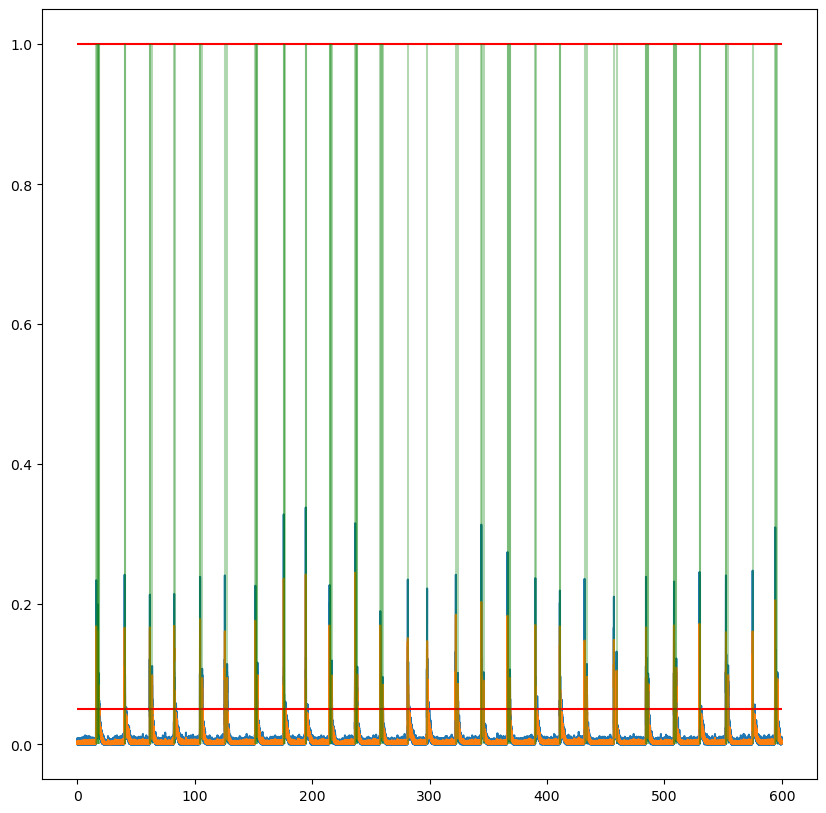

burst found in bin 1633 (time 16.10 s)
burst found in bin 1663 (time 16.40 s)
burst found in bin 1744 (time 17.21 s)
burst found in bin 1774 (time 17.51 s)
burst found in bin 1835 (time 18.12 s)
burst found in bin 1868 (time 18.45 s)
burst found in bin 4051 (time 40.28 s)
burst found in bin 4081 (time 40.58 s)
burst found in bin 6202 (time 61.79 s)
burst found in bin 6232 (time 62.09 s)
burst found in bin 6388 (time 63.65 s)
burst found in bin 8269 (time 82.46 s)
burst found in bin 8300 (time 82.77 s)
burst found in bin 10475 (time 104.52 s)
burst found in bin 10505 (time 104.82 s)
burst found in bin 10650 (time 106.27 s)
burst found in bin 12587 (time 125.64 s)
burst found in bin 12776 (time 127.53 s)
burst found in bin 15183 (time 151.60 s)
burst found in bin 15213 (time 151.90 s)
burst found in bin 15307 (time 152.84 s)
burst found in bin 15360 (time 153.37 s)
burst found in bin 17601 (time 175.78 s)
burst found in bin 17631 (time 176.08 s)
burst found in bin 17720 (time 176.97 s)
b

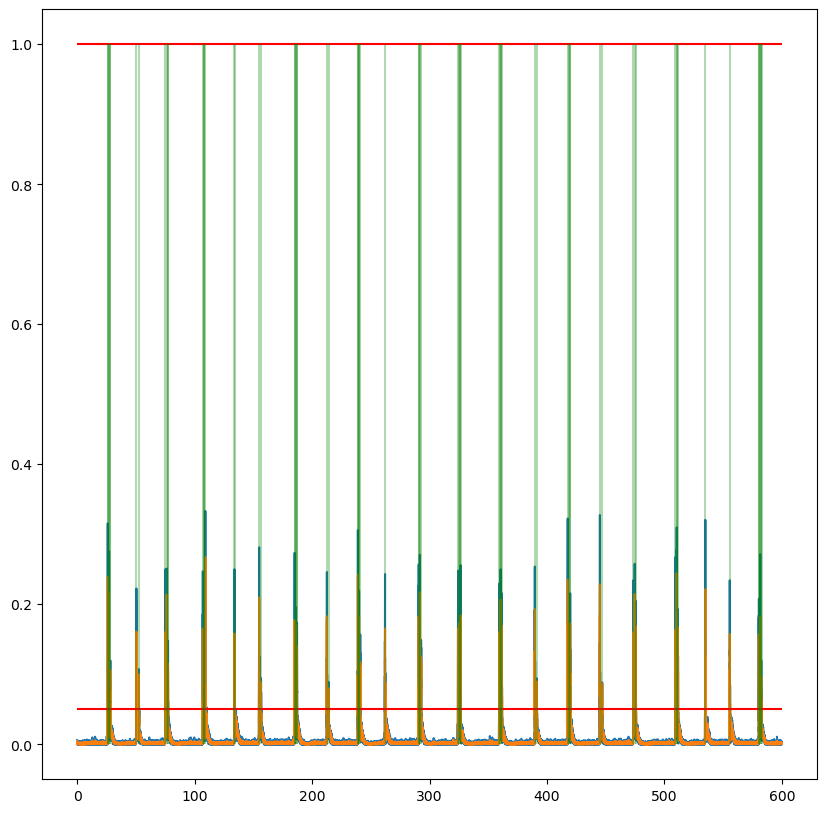

burst found in bin 2611 (time 25.89 s)
burst found in bin 2641 (time 26.19 s)
burst found in bin 2721 (time 26.99 s)
burst found in bin 2795 (time 27.73 s)
burst found in bin 2834 (time 28.12 s)
burst found in bin 5054 (time 50.32 s)
burst found in bin 5260 (time 52.38 s)
burst found in bin 7524 (time 75.02 s)
burst found in bin 7631 (time 76.09 s)
burst found in bin 7702 (time 76.80 s)
burst found in bin 7733 (time 77.11 s)
burst found in bin 10707 (time 106.85 s)
burst found in bin 10814 (time 107.92 s)
burst found in bin 10846 (time 108.24 s)
burst found in bin 10926 (time 109.04 s)
burst found in bin 13400 (time 133.78 s)
burst found in bin 13431 (time 134.09 s)
burst found in bin 15505 (time 154.83 s)
burst found in bin 15664 (time 156.42 s)
burst found in bin 18523 (time 185.01 s)
burst found in bin 18553 (time 185.31 s)
burst found in bin 18624 (time 186.02 s)
burst found in bin 18694 (time 186.72 s)
burst found in bin 18728 (time 187.06 s)
burst found in bin 21275 (time 212.53 

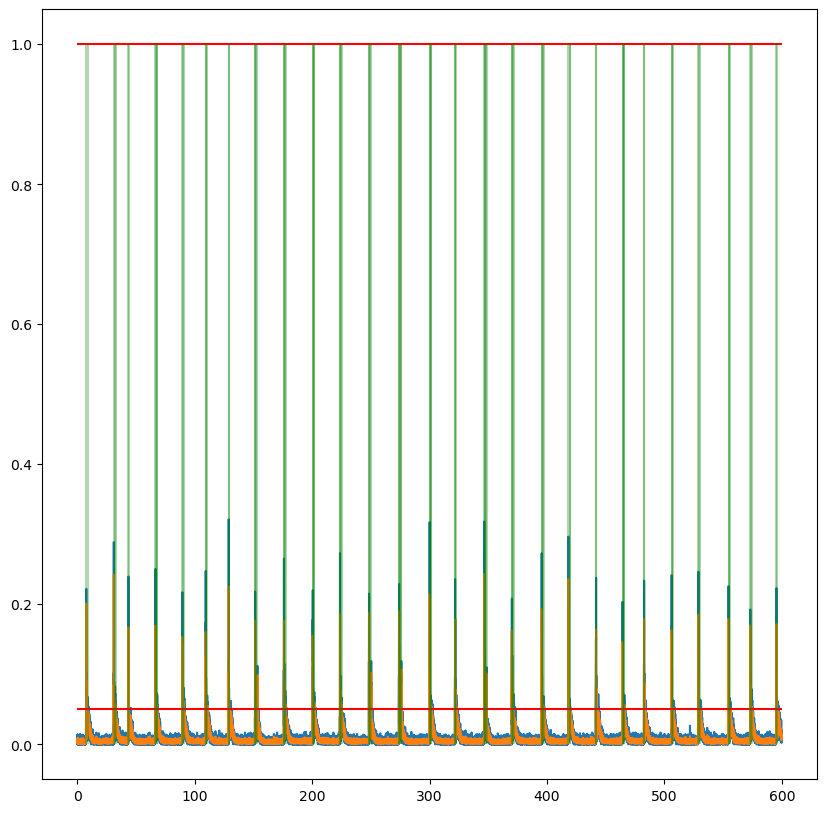

burst found in bin 785 (time 7.62 s)
burst found in bin 914 (time 8.91 s)
burst found in bin 3129 (time 31.06 s)
burst found in bin 3235 (time 32.12 s)
burst found in bin 3289 (time 32.66 s)
burst found in bin 4374 (time 43.51 s)
burst found in bin 4405 (time 43.82 s)
burst found in bin 6672 (time 66.49 s)
burst found in bin 6703 (time 66.80 s)
burst found in bin 6787 (time 67.64 s)
burst found in bin 6824 (time 68.01 s)
burst found in bin 8962 (time 89.39 s)
burst found in bin 8992 (time 89.69 s)
burst found in bin 9086 (time 90.63 s)
burst found in bin 10955 (time 109.32 s)
burst found in bin 10986 (time 109.63 s)
burst found in bin 11095 (time 110.72 s)
burst found in bin 12913 (time 128.90 s)
burst found in bin 12943 (time 129.20 s)
burst found in bin 15164 (time 151.41 s)
burst found in bin 15194 (time 151.71 s)
burst found in bin 15279 (time 152.56 s)
burst found in bin 15361 (time 153.38 s)
burst found in bin 17620 (time 175.97 s)
burst found in bin 17650 (time 176.27 s)
burst f

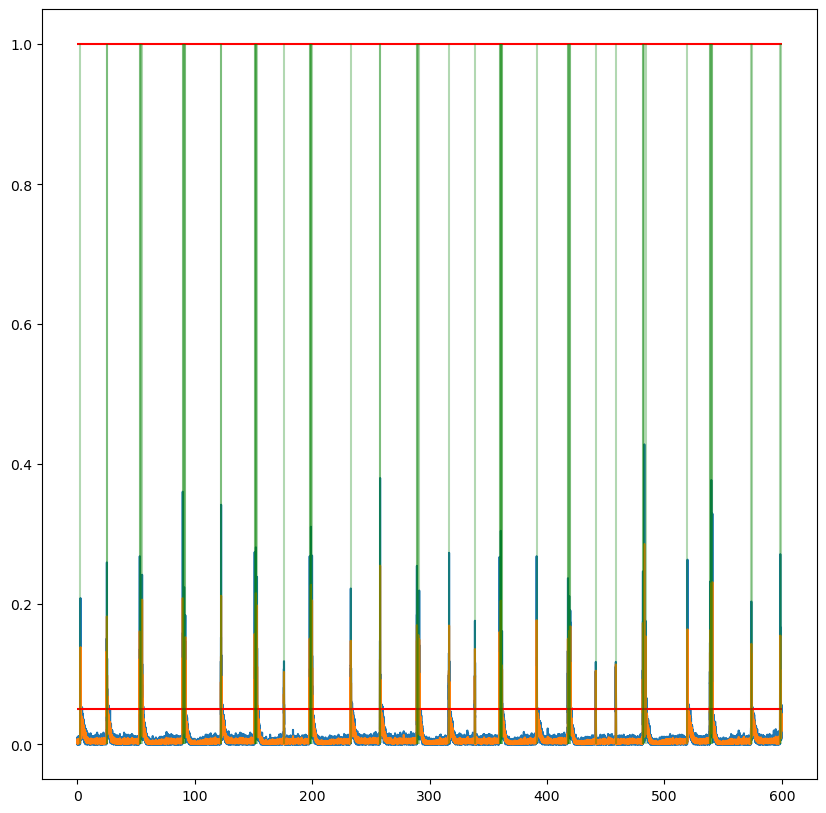

burst found in bin 291 (time 2.68 s)
burst found in bin 2537 (time 25.14 s)
burst found in bin 2568 (time 25.45 s)
burst found in bin 5334 (time 53.11 s)
burst found in bin 5364 (time 53.41 s)
burst found in bin 5444 (time 54.21 s)
burst found in bin 5537 (time 55.14 s)
burst found in bin 8998 (time 89.75 s)
burst found in bin 9029 (time 90.06 s)
burst found in bin 9119 (time 90.96 s)
burst found in bin 9149 (time 91.26 s)
burst found in bin 9219 (time 91.96 s)
burst found in bin 12266 (time 122.43 s)
burst found in bin 12296 (time 122.73 s)
burst found in bin 15124 (time 151.01 s)
burst found in bin 15158 (time 151.35 s)
burst found in bin 15229 (time 152.06 s)
burst found in bin 15259 (time 152.36 s)
burst found in bin 15321 (time 152.98 s)
burst found in bin 17622 (time 175.99 s)
burst found in bin 19811 (time 197.88 s)
burst found in bin 19846 (time 198.23 s)
burst found in bin 19918 (time 198.95 s)
burst found in bin 19948 (time 199.25 s)
burst found in bin 20010 (time 199.87 s)
b

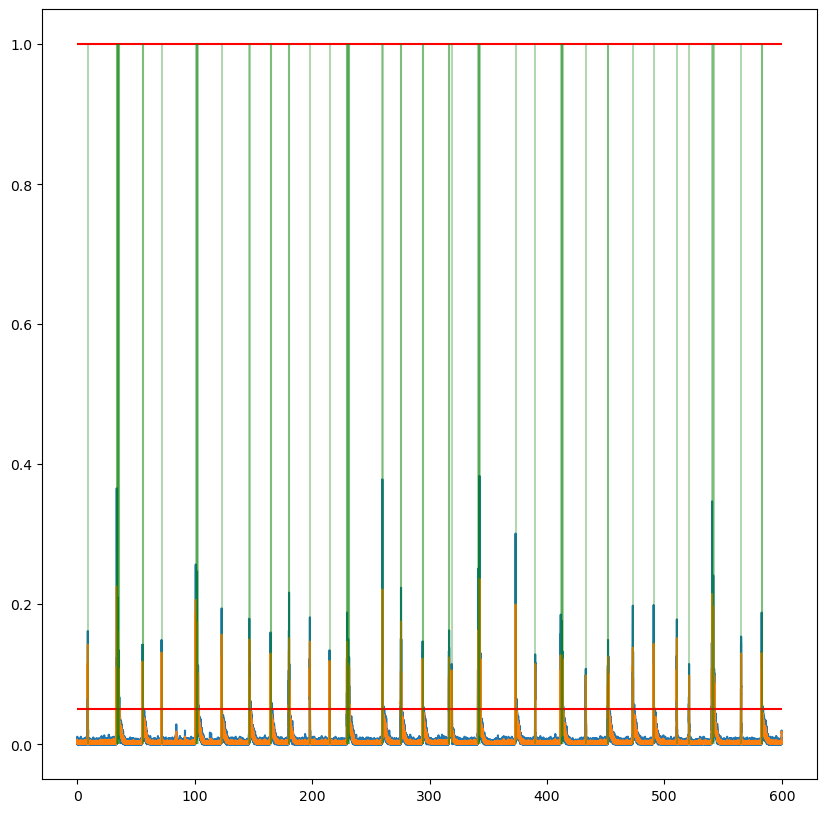

burst found in bin 915 (time 8.92 s)
burst found in bin 3378 (time 33.55 s)
burst found in bin 3408 (time 33.85 s)
burst found in bin 3470 (time 34.47 s)
burst found in bin 3500 (time 34.77 s)
burst found in bin 3554 (time 35.31 s)
burst found in bin 3590 (time 35.67 s)
burst found in bin 5574 (time 55.51 s)
burst found in bin 5605 (time 55.82 s)
burst found in bin 7191 (time 71.68 s)
burst found in bin 10107 (time 100.84 s)
burst found in bin 10217 (time 101.94 s)
burst found in bin 10247 (time 102.24 s)
burst found in bin 10300 (time 102.77 s)
burst found in bin 12312 (time 122.89 s)
burst found in bin 14666 (time 146.43 s)
burst found in bin 14696 (time 146.73 s)
burst found in bin 16475 (time 164.52 s)
burst found in bin 16505 (time 164.82 s)
burst found in bin 18053 (time 180.30 s)
burst found in bin 18084 (time 180.61 s)
burst found in bin 19827 (time 198.04 s)
burst found in bin 21498 (time 214.75 s)
burst found in bin 22991 (time 229.68 s)
burst found in bin 23021 (time 229.98 

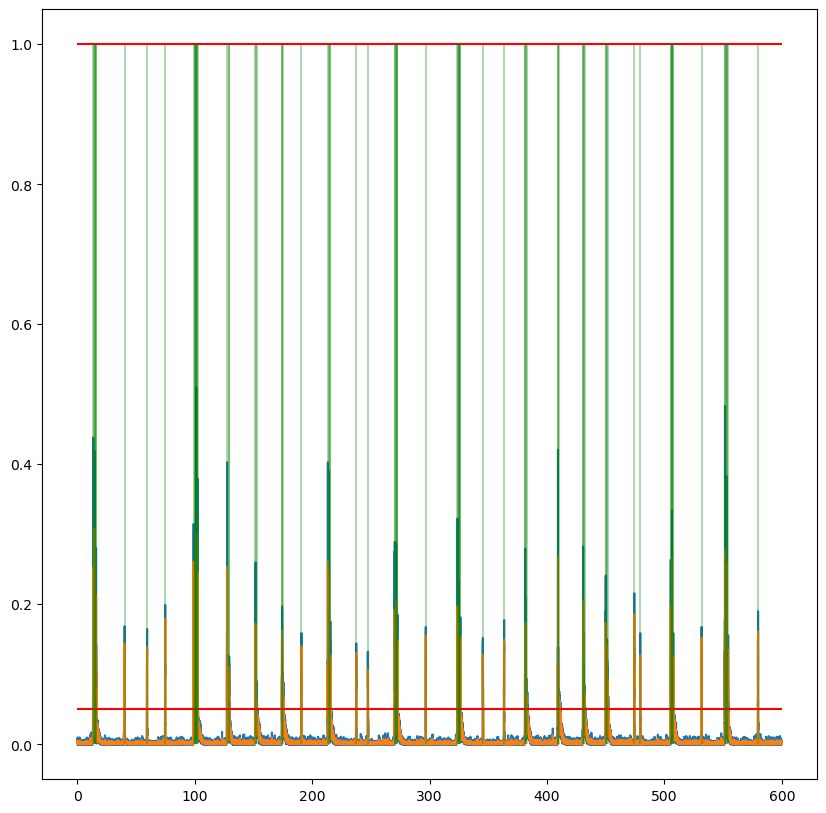

burst found in bin 1383 (time 13.60 s)
burst found in bin 1414 (time 13.91 s)
burst found in bin 1495 (time 14.72 s)
burst found in bin 1525 (time 15.02 s)
burst found in bin 1581 (time 15.58 s)
burst found in bin 1615 (time 15.92 s)
burst found in bin 4047 (time 40.24 s)
burst found in bin 5963 (time 59.40 s)
burst found in bin 7506 (time 74.83 s)
burst found in bin 9923 (time 99.00 s)
burst found in bin 10014 (time 99.91 s)
burst found in bin 10048 (time 100.25 s)
burst found in bin 10089 (time 100.66 s)
burst found in bin 10121 (time 100.98 s)
burst found in bin 10153 (time 101.30 s)
burst found in bin 10183 (time 101.60 s)
burst found in bin 10233 (time 102.10 s)
burst found in bin 10273 (time 102.50 s)
burst found in bin 12775 (time 127.52 s)
burst found in bin 12908 (time 128.85 s)
burst found in bin 12950 (time 129.27 s)
burst found in bin 15192 (time 151.69 s)
burst found in bin 15222 (time 151.99 s)
burst found in bin 15305 (time 152.82 s)
burst found in bin 17453 (time 174.30

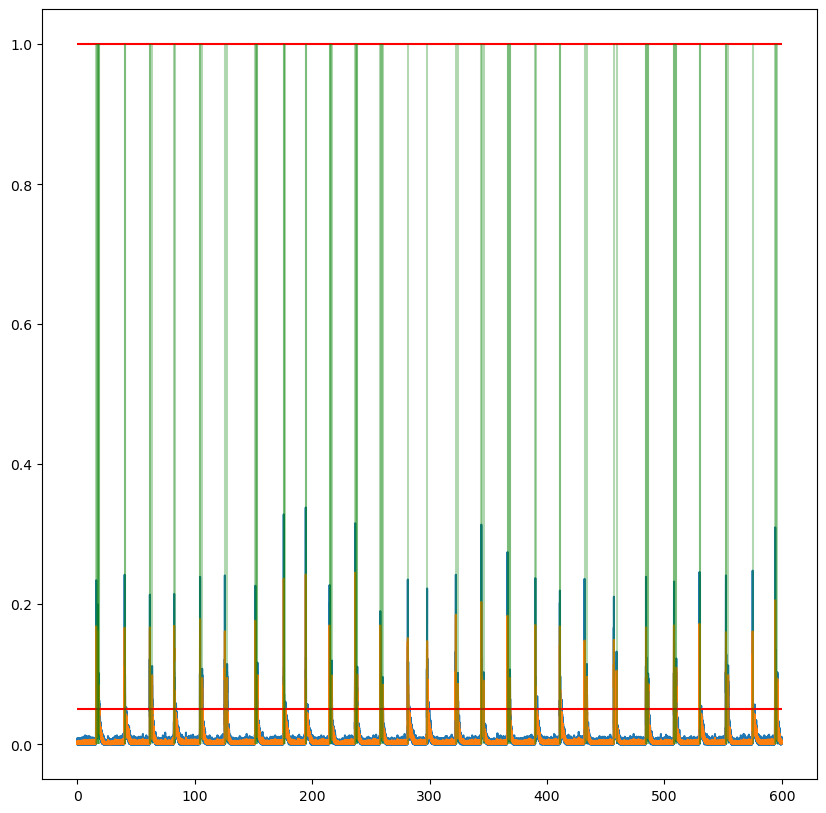

burst found in bin 1633 (time 16.10 s)
burst found in bin 1663 (time 16.40 s)
burst found in bin 1744 (time 17.21 s)
burst found in bin 1774 (time 17.51 s)
burst found in bin 1835 (time 18.12 s)
burst found in bin 1868 (time 18.45 s)
burst found in bin 4051 (time 40.28 s)
burst found in bin 4081 (time 40.58 s)
burst found in bin 6202 (time 61.79 s)
burst found in bin 6232 (time 62.09 s)
burst found in bin 6388 (time 63.65 s)
burst found in bin 8269 (time 82.46 s)
burst found in bin 8300 (time 82.77 s)
burst found in bin 10475 (time 104.52 s)
burst found in bin 10505 (time 104.82 s)
burst found in bin 10650 (time 106.27 s)
burst found in bin 12587 (time 125.64 s)
burst found in bin 12776 (time 127.53 s)
burst found in bin 15183 (time 151.60 s)
burst found in bin 15213 (time 151.90 s)
burst found in bin 15307 (time 152.84 s)
burst found in bin 15360 (time 153.37 s)
burst found in bin 17601 (time 175.78 s)
burst found in bin 17631 (time 176.08 s)
burst found in bin 17720 (time 176.97 s)
b

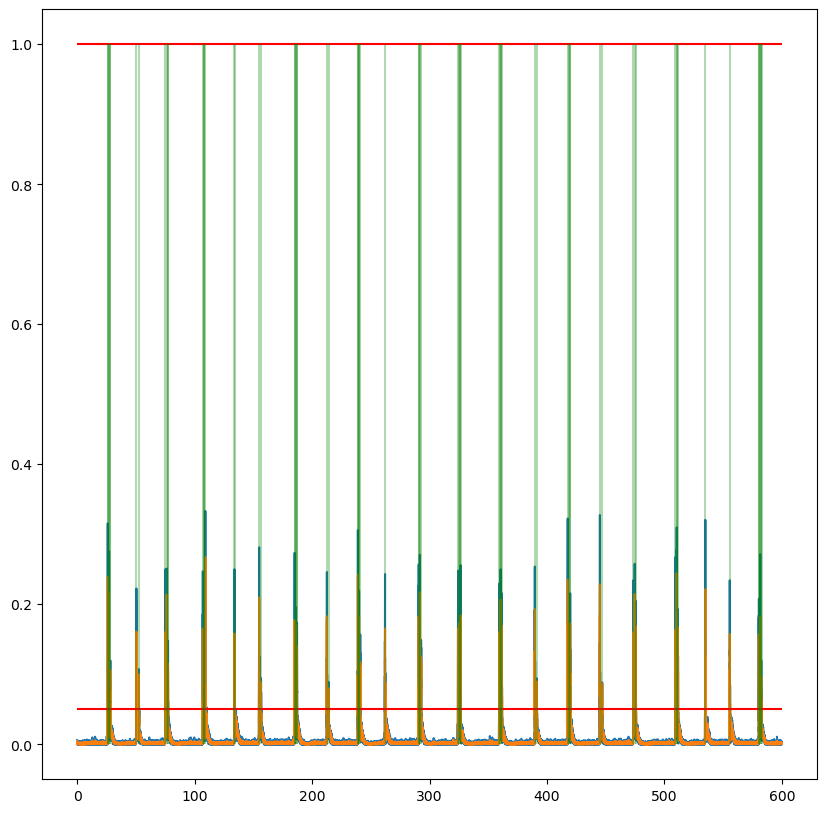

burst found in bin 2611 (time 25.89 s)
burst found in bin 2641 (time 26.19 s)
burst found in bin 2721 (time 26.99 s)
burst found in bin 2795 (time 27.73 s)
burst found in bin 2834 (time 28.12 s)
burst found in bin 5054 (time 50.32 s)
burst found in bin 5260 (time 52.38 s)
burst found in bin 7524 (time 75.02 s)
burst found in bin 7631 (time 76.09 s)
burst found in bin 7702 (time 76.80 s)
burst found in bin 7733 (time 77.11 s)
burst found in bin 10707 (time 106.85 s)
burst found in bin 10814 (time 107.92 s)
burst found in bin 10846 (time 108.24 s)
burst found in bin 10926 (time 109.04 s)
burst found in bin 13400 (time 133.78 s)
burst found in bin 13431 (time 134.09 s)
burst found in bin 15505 (time 154.83 s)
burst found in bin 15664 (time 156.42 s)
burst found in bin 18523 (time 185.01 s)
burst found in bin 18553 (time 185.31 s)
burst found in bin 18624 (time 186.02 s)
burst found in bin 18694 (time 186.72 s)
burst found in bin 18728 (time 187.06 s)
burst found in bin 21275 (time 212.53 

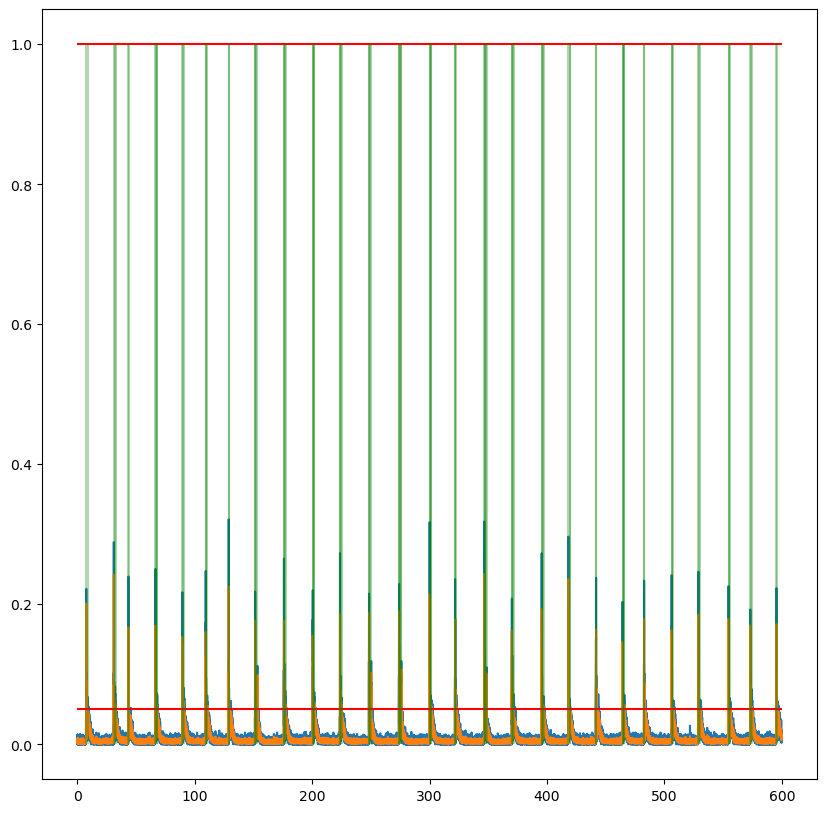

burst found in bin 785 (time 7.62 s)
burst found in bin 914 (time 8.91 s)
burst found in bin 3129 (time 31.06 s)
burst found in bin 3235 (time 32.12 s)
burst found in bin 3289 (time 32.66 s)
burst found in bin 4374 (time 43.51 s)
burst found in bin 4405 (time 43.82 s)
burst found in bin 6672 (time 66.49 s)
burst found in bin 6703 (time 66.80 s)
burst found in bin 6787 (time 67.64 s)
burst found in bin 6824 (time 68.01 s)
burst found in bin 8962 (time 89.39 s)
burst found in bin 8992 (time 89.69 s)
burst found in bin 9086 (time 90.63 s)
burst found in bin 10955 (time 109.32 s)
burst found in bin 10986 (time 109.63 s)
burst found in bin 11095 (time 110.72 s)
burst found in bin 12913 (time 128.90 s)
burst found in bin 12943 (time 129.20 s)
burst found in bin 15164 (time 151.41 s)
burst found in bin 15194 (time 151.71 s)
burst found in bin 15279 (time 152.56 s)
burst found in bin 15361 (time 153.38 s)
burst found in bin 17620 (time 175.97 s)
burst found in bin 17650 (time 176.27 s)
burst f

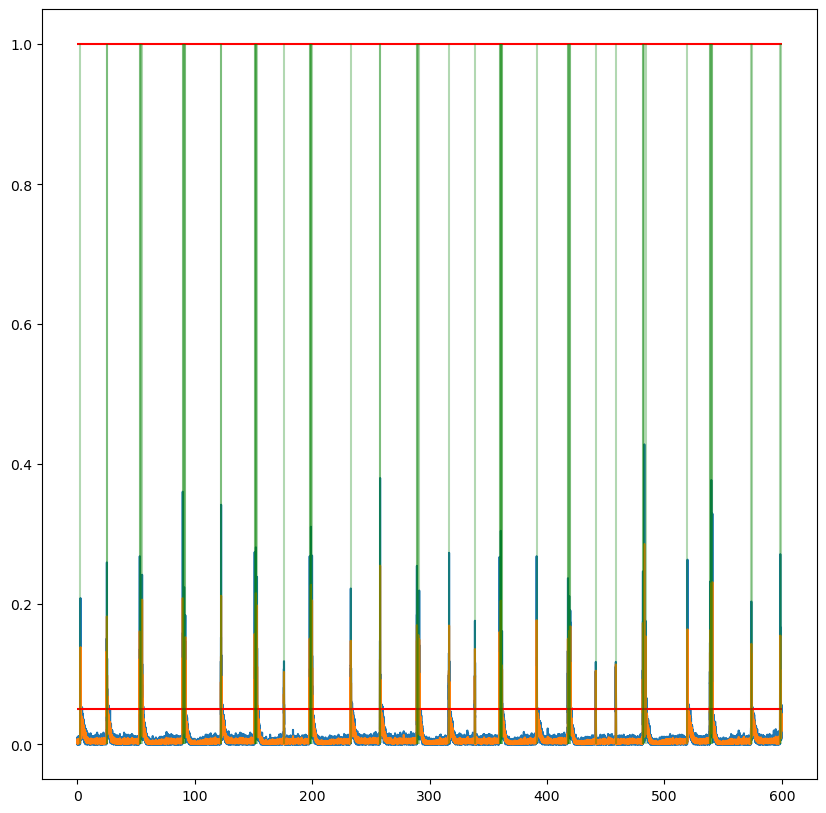

burst found in bin 291 (time 2.68 s)
burst found in bin 2537 (time 25.14 s)
burst found in bin 2568 (time 25.45 s)
burst found in bin 5334 (time 53.11 s)
burst found in bin 5364 (time 53.41 s)
burst found in bin 5444 (time 54.21 s)
burst found in bin 5537 (time 55.14 s)
burst found in bin 8998 (time 89.75 s)
burst found in bin 9029 (time 90.06 s)
burst found in bin 9119 (time 90.96 s)
burst found in bin 9149 (time 91.26 s)
burst found in bin 9219 (time 91.96 s)
burst found in bin 12266 (time 122.43 s)
burst found in bin 12296 (time 122.73 s)
burst found in bin 15124 (time 151.01 s)
burst found in bin 15158 (time 151.35 s)
burst found in bin 15229 (time 152.06 s)
burst found in bin 15259 (time 152.36 s)
burst found in bin 15321 (time 152.98 s)
burst found in bin 17622 (time 175.99 s)
burst found in bin 19811 (time 197.88 s)
burst found in bin 19846 (time 198.23 s)
burst found in bin 19918 (time 198.95 s)
burst found in bin 19948 (time 199.25 s)
burst found in bin 20010 (time 199.87 s)
b

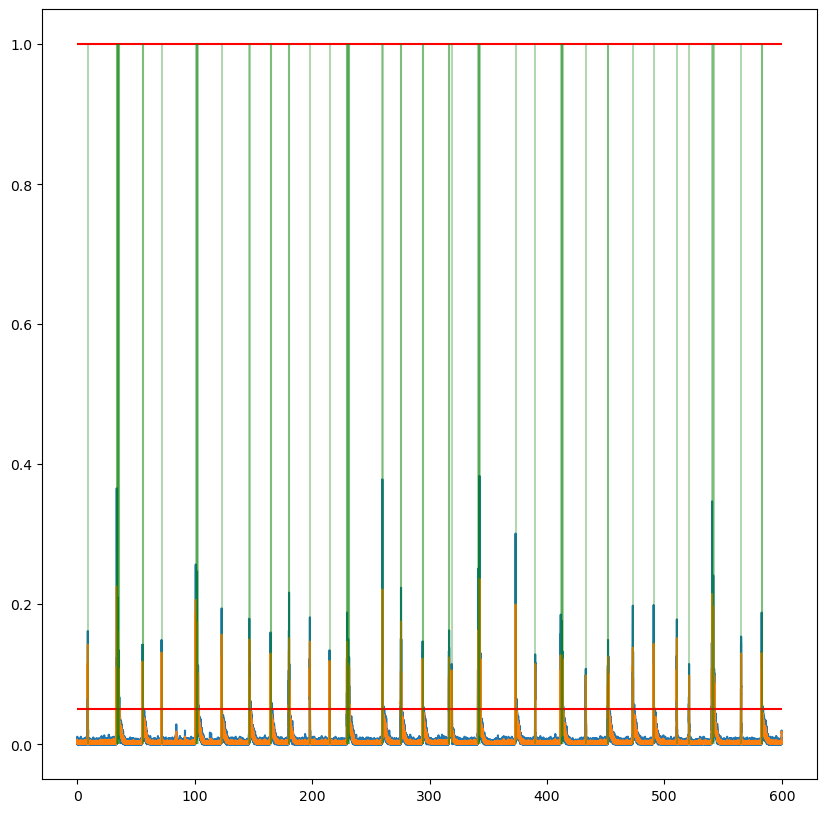

burst found in bin 915 (time 8.92 s)
burst found in bin 3378 (time 33.55 s)
burst found in bin 3408 (time 33.85 s)
burst found in bin 3470 (time 34.47 s)
burst found in bin 3500 (time 34.77 s)
burst found in bin 3554 (time 35.31 s)
burst found in bin 3590 (time 35.67 s)
burst found in bin 5574 (time 55.51 s)
burst found in bin 5605 (time 55.82 s)
burst found in bin 7191 (time 71.68 s)
burst found in bin 10107 (time 100.84 s)
burst found in bin 10217 (time 101.94 s)
burst found in bin 10247 (time 102.24 s)
burst found in bin 10300 (time 102.77 s)
burst found in bin 12312 (time 122.89 s)
burst found in bin 14666 (time 146.43 s)
burst found in bin 14696 (time 146.73 s)
burst found in bin 16475 (time 164.52 s)
burst found in bin 16505 (time 164.82 s)
burst found in bin 18053 (time 180.30 s)
burst found in bin 18084 (time 180.61 s)
burst found in bin 19827 (time 198.04 s)
burst found in bin 21498 (time 214.75 s)
burst found in bin 22991 (time 229.68 s)
burst found in bin 23021 (time 229.98 

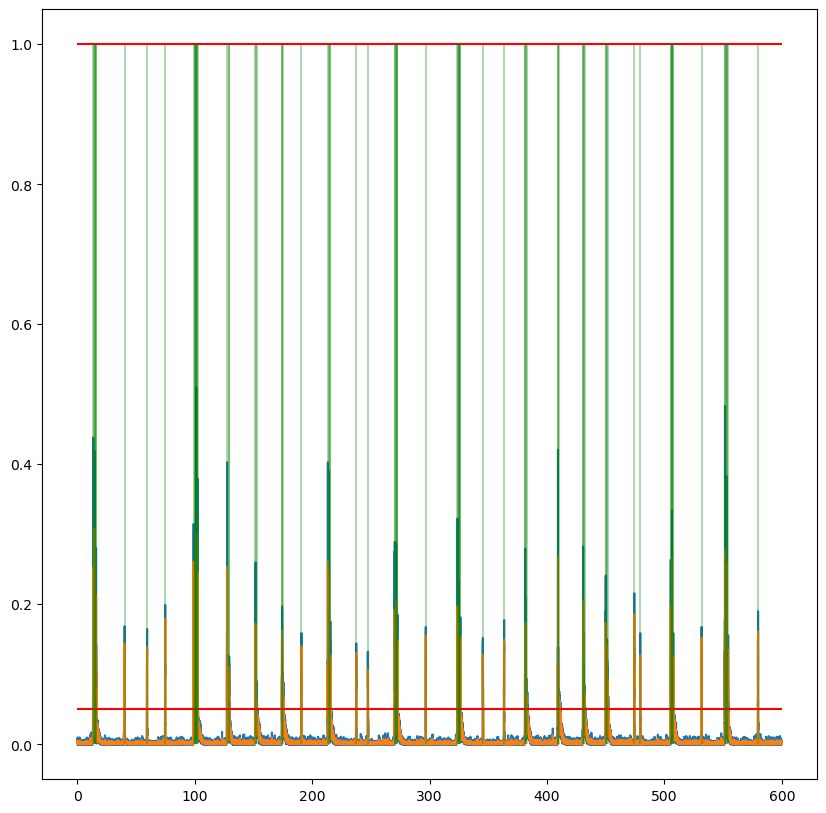

burst found in bin 1383 (time 13.60 s)
burst found in bin 1414 (time 13.91 s)
burst found in bin 1495 (time 14.72 s)
burst found in bin 1525 (time 15.02 s)
burst found in bin 1581 (time 15.58 s)
burst found in bin 1615 (time 15.92 s)
burst found in bin 4047 (time 40.24 s)
burst found in bin 5963 (time 59.40 s)
burst found in bin 7506 (time 74.83 s)
burst found in bin 9923 (time 99.00 s)
burst found in bin 10014 (time 99.91 s)
burst found in bin 10048 (time 100.25 s)
burst found in bin 10089 (time 100.66 s)
burst found in bin 10121 (time 100.98 s)
burst found in bin 10153 (time 101.30 s)
burst found in bin 10183 (time 101.60 s)
burst found in bin 10233 (time 102.10 s)
burst found in bin 10273 (time 102.50 s)
burst found in bin 12775 (time 127.52 s)
burst found in bin 12908 (time 128.85 s)
burst found in bin 12950 (time 129.27 s)
burst found in bin 15192 (time 151.69 s)
burst found in bin 15222 (time 151.99 s)
burst found in bin 15305 (time 152.82 s)
burst found in bin 17453 (time 174.30

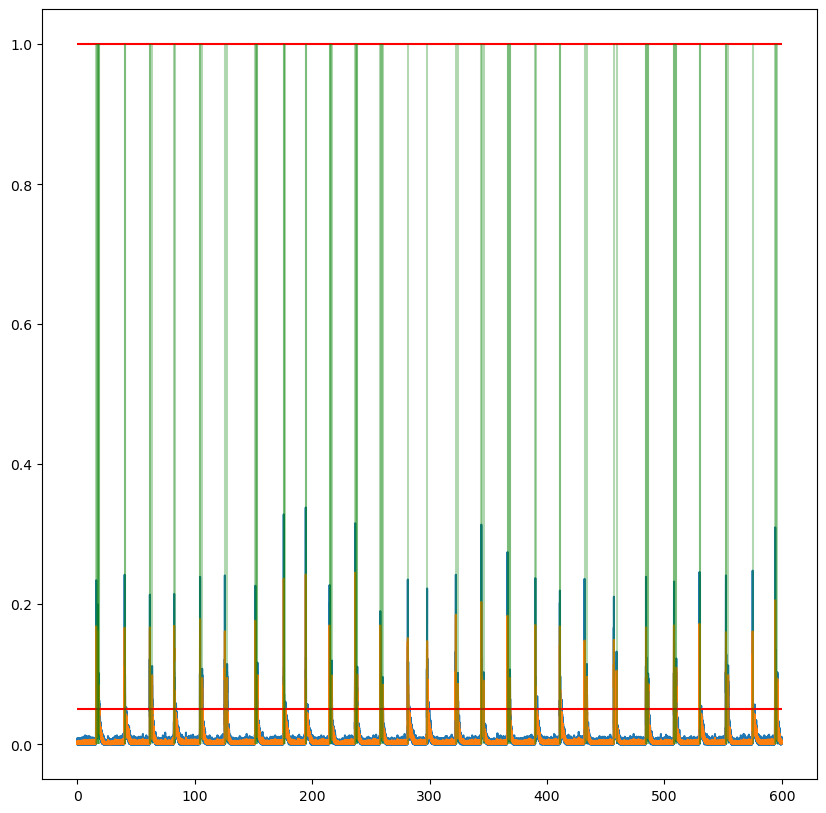

burst found in bin 1633 (time 16.10 s)
burst found in bin 1663 (time 16.40 s)
burst found in bin 1744 (time 17.21 s)
burst found in bin 1774 (time 17.51 s)
burst found in bin 1835 (time 18.12 s)
burst found in bin 1868 (time 18.45 s)
burst found in bin 4051 (time 40.28 s)
burst found in bin 4081 (time 40.58 s)
burst found in bin 6202 (time 61.79 s)
burst found in bin 6232 (time 62.09 s)
burst found in bin 6388 (time 63.65 s)
burst found in bin 8269 (time 82.46 s)
burst found in bin 8300 (time 82.77 s)
burst found in bin 10475 (time 104.52 s)
burst found in bin 10505 (time 104.82 s)
burst found in bin 10650 (time 106.27 s)
burst found in bin 12587 (time 125.64 s)
burst found in bin 12776 (time 127.53 s)
burst found in bin 15183 (time 151.60 s)
burst found in bin 15213 (time 151.90 s)
burst found in bin 15307 (time 152.84 s)
burst found in bin 15360 (time 153.37 s)
burst found in bin 17601 (time 175.78 s)
burst found in bin 17631 (time 176.08 s)
burst found in bin 17720 (time 176.97 s)
b

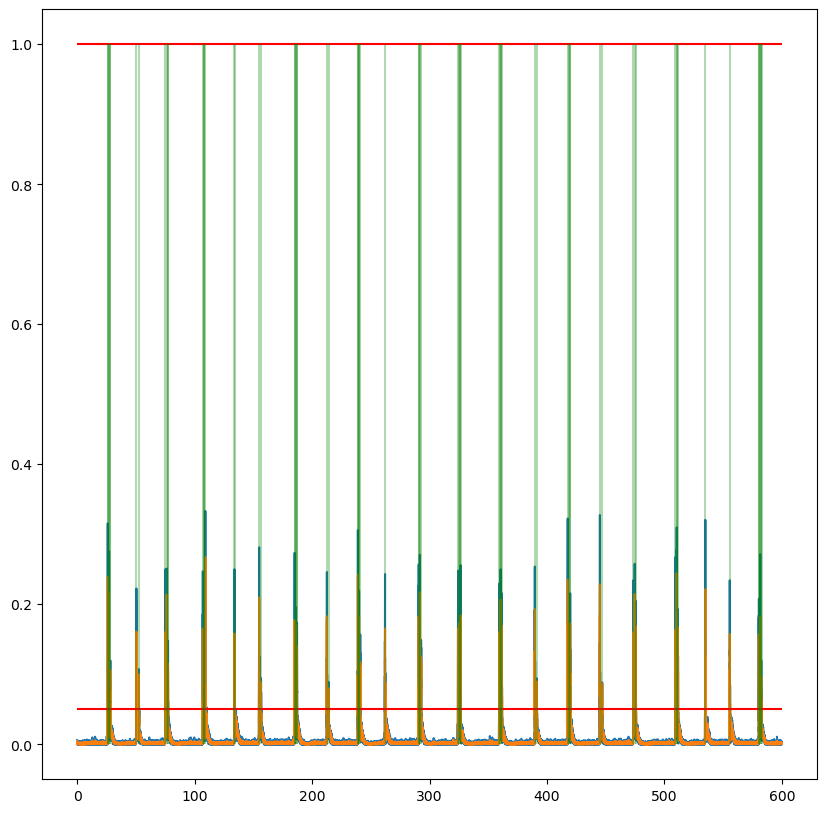

burst found in bin 2611 (time 25.89 s)
burst found in bin 2641 (time 26.19 s)
burst found in bin 2721 (time 26.99 s)
burst found in bin 2795 (time 27.73 s)
burst found in bin 2834 (time 28.12 s)
burst found in bin 5054 (time 50.32 s)
burst found in bin 5260 (time 52.38 s)
burst found in bin 7524 (time 75.02 s)
burst found in bin 7631 (time 76.09 s)
burst found in bin 7702 (time 76.80 s)
burst found in bin 7733 (time 77.11 s)
burst found in bin 10707 (time 106.85 s)
burst found in bin 10814 (time 107.92 s)
burst found in bin 10846 (time 108.24 s)
burst found in bin 10926 (time 109.04 s)
burst found in bin 13400 (time 133.78 s)
burst found in bin 13431 (time 134.09 s)
burst found in bin 15505 (time 154.83 s)
burst found in bin 15664 (time 156.42 s)
burst found in bin 18523 (time 185.01 s)
burst found in bin 18553 (time 185.31 s)
burst found in bin 18624 (time 186.02 s)
burst found in bin 18694 (time 186.72 s)
burst found in bin 18728 (time 187.06 s)
burst found in bin 21275 (time 212.53 

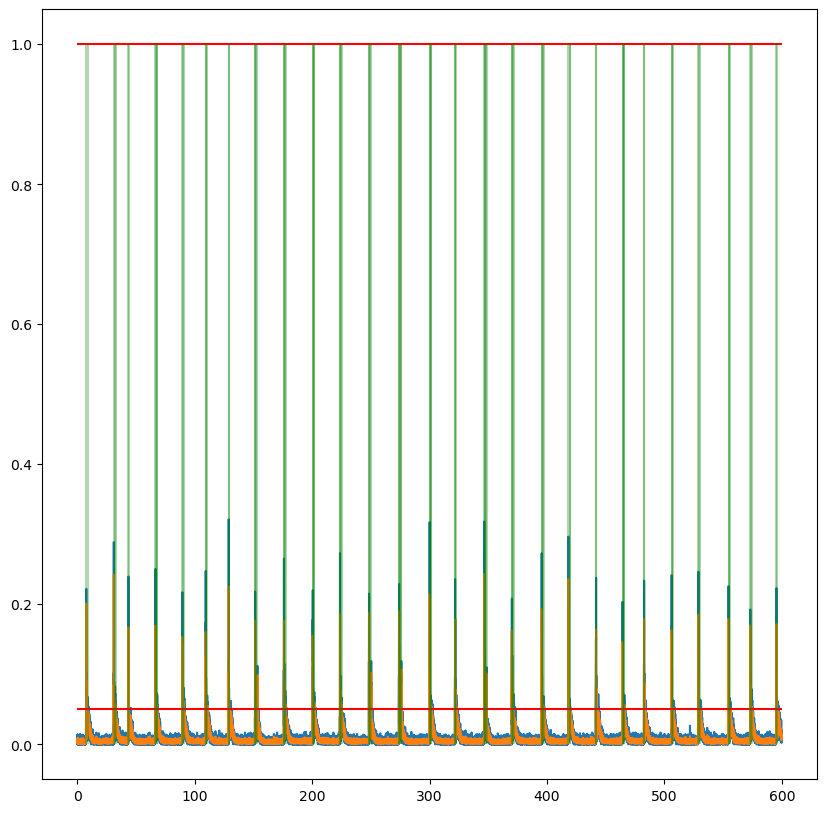

burst found in bin 785 (time 7.62 s)
burst found in bin 914 (time 8.91 s)
burst found in bin 3129 (time 31.06 s)
burst found in bin 3235 (time 32.12 s)
burst found in bin 3289 (time 32.66 s)
burst found in bin 4374 (time 43.51 s)
burst found in bin 4405 (time 43.82 s)
burst found in bin 6672 (time 66.49 s)
burst found in bin 6703 (time 66.80 s)
burst found in bin 6787 (time 67.64 s)
burst found in bin 6824 (time 68.01 s)
burst found in bin 8962 (time 89.39 s)
burst found in bin 8992 (time 89.69 s)
burst found in bin 9086 (time 90.63 s)
burst found in bin 10955 (time 109.32 s)
burst found in bin 10986 (time 109.63 s)
burst found in bin 11095 (time 110.72 s)
burst found in bin 12913 (time 128.90 s)
burst found in bin 12943 (time 129.20 s)
burst found in bin 15164 (time 151.41 s)
burst found in bin 15194 (time 151.71 s)
burst found in bin 15279 (time 152.56 s)
burst found in bin 15361 (time 153.38 s)
burst found in bin 17620 (time 175.97 s)
burst found in bin 17650 (time 176.27 s)
burst f

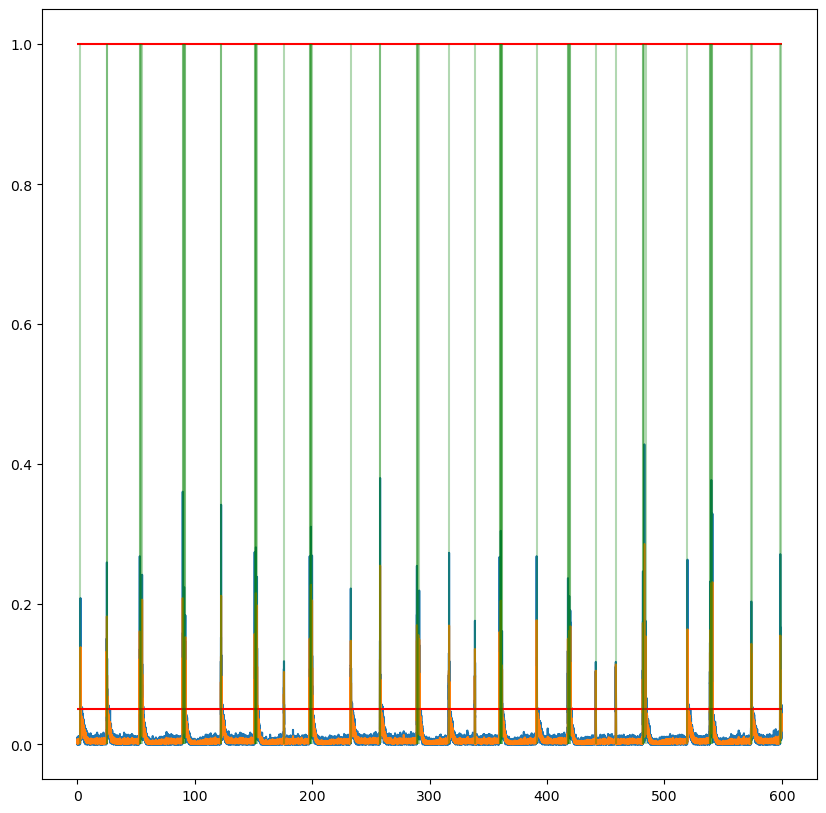

burst found in bin 291 (time 2.68 s)
burst found in bin 2537 (time 25.14 s)
burst found in bin 2568 (time 25.45 s)
burst found in bin 5334 (time 53.11 s)
burst found in bin 5364 (time 53.41 s)
burst found in bin 5444 (time 54.21 s)
burst found in bin 5537 (time 55.14 s)
burst found in bin 8998 (time 89.75 s)
burst found in bin 9029 (time 90.06 s)
burst found in bin 9119 (time 90.96 s)
burst found in bin 9149 (time 91.26 s)
burst found in bin 9219 (time 91.96 s)
burst found in bin 12266 (time 122.43 s)
burst found in bin 12296 (time 122.73 s)
burst found in bin 15124 (time 151.01 s)
burst found in bin 15158 (time 151.35 s)
burst found in bin 15229 (time 152.06 s)
burst found in bin 15259 (time 152.36 s)
burst found in bin 15321 (time 152.98 s)
burst found in bin 17622 (time 175.99 s)
burst found in bin 19811 (time 197.88 s)
burst found in bin 19846 (time 198.23 s)
burst found in bin 19918 (time 198.95 s)
burst found in bin 19948 (time 199.25 s)
burst found in bin 20010 (time 199.87 s)
b

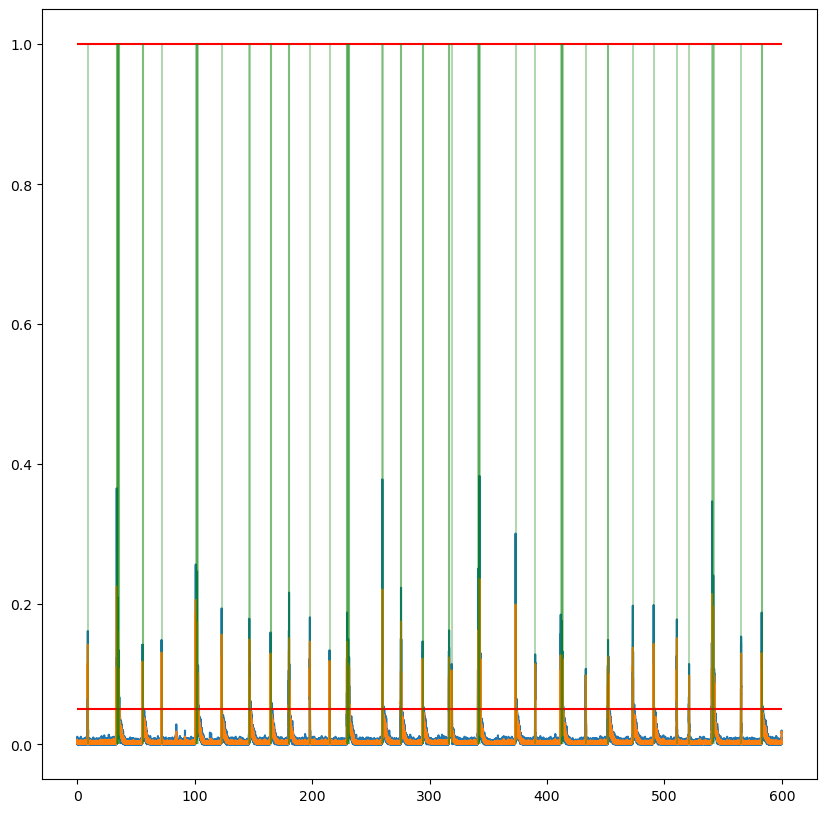

burst found in bin 915 (time 8.92 s)
burst found in bin 3378 (time 33.55 s)
burst found in bin 3408 (time 33.85 s)
burst found in bin 3470 (time 34.47 s)
burst found in bin 3500 (time 34.77 s)
burst found in bin 3554 (time 35.31 s)
burst found in bin 3590 (time 35.67 s)
burst found in bin 5574 (time 55.51 s)
burst found in bin 5605 (time 55.82 s)
burst found in bin 7191 (time 71.68 s)
burst found in bin 10107 (time 100.84 s)
burst found in bin 10217 (time 101.94 s)
burst found in bin 10247 (time 102.24 s)
burst found in bin 10300 (time 102.77 s)
burst found in bin 12312 (time 122.89 s)
burst found in bin 14666 (time 146.43 s)
burst found in bin 14696 (time 146.73 s)
burst found in bin 16475 (time 164.52 s)
burst found in bin 16505 (time 164.82 s)
burst found in bin 18053 (time 180.30 s)
burst found in bin 18084 (time 180.61 s)
burst found in bin 19827 (time 198.04 s)
burst found in bin 21498 (time 214.75 s)
burst found in bin 22991 (time 229.68 s)
burst found in bin 23021 (time 229.98 

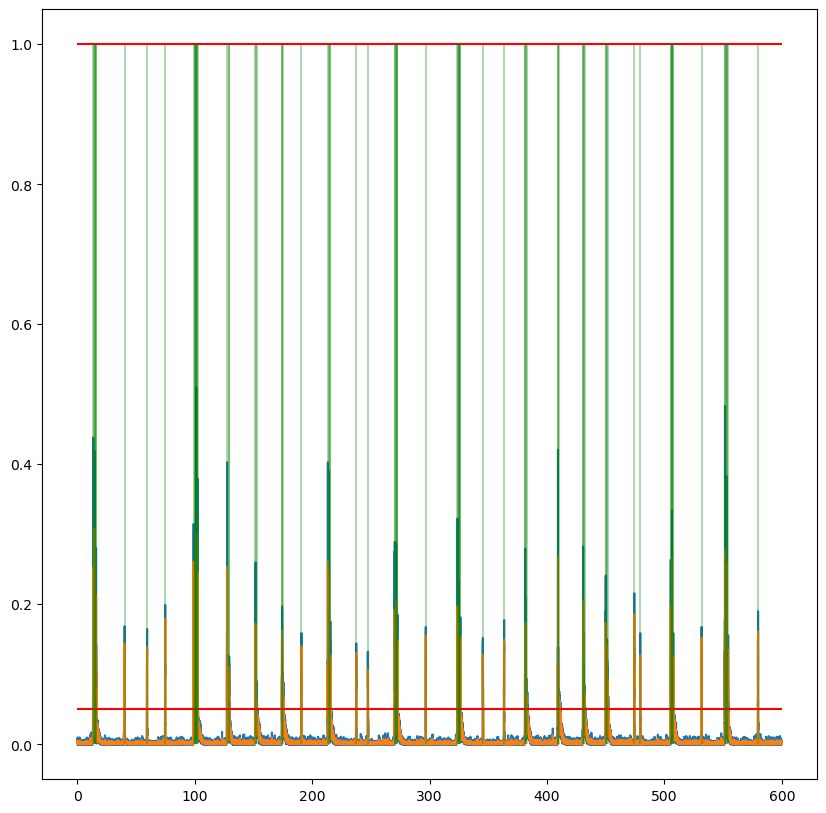

burst found in bin 1383 (time 13.60 s)
burst found in bin 1414 (time 13.91 s)
burst found in bin 1495 (time 14.72 s)
burst found in bin 1525 (time 15.02 s)
burst found in bin 1581 (time 15.58 s)
burst found in bin 1615 (time 15.92 s)
burst found in bin 4047 (time 40.24 s)
burst found in bin 5963 (time 59.40 s)
burst found in bin 7506 (time 74.83 s)
burst found in bin 9923 (time 99.00 s)
burst found in bin 10014 (time 99.91 s)
burst found in bin 10048 (time 100.25 s)
burst found in bin 10089 (time 100.66 s)
burst found in bin 10121 (time 100.98 s)
burst found in bin 10153 (time 101.30 s)
burst found in bin 10183 (time 101.60 s)
burst found in bin 10233 (time 102.10 s)
burst found in bin 10273 (time 102.50 s)
burst found in bin 12775 (time 127.52 s)
burst found in bin 12908 (time 128.85 s)
burst found in bin 12950 (time 129.27 s)
burst found in bin 15192 (time 151.69 s)
burst found in bin 15222 (time 151.99 s)
burst found in bin 15305 (time 152.82 s)
burst found in bin 17453 (time 174.30

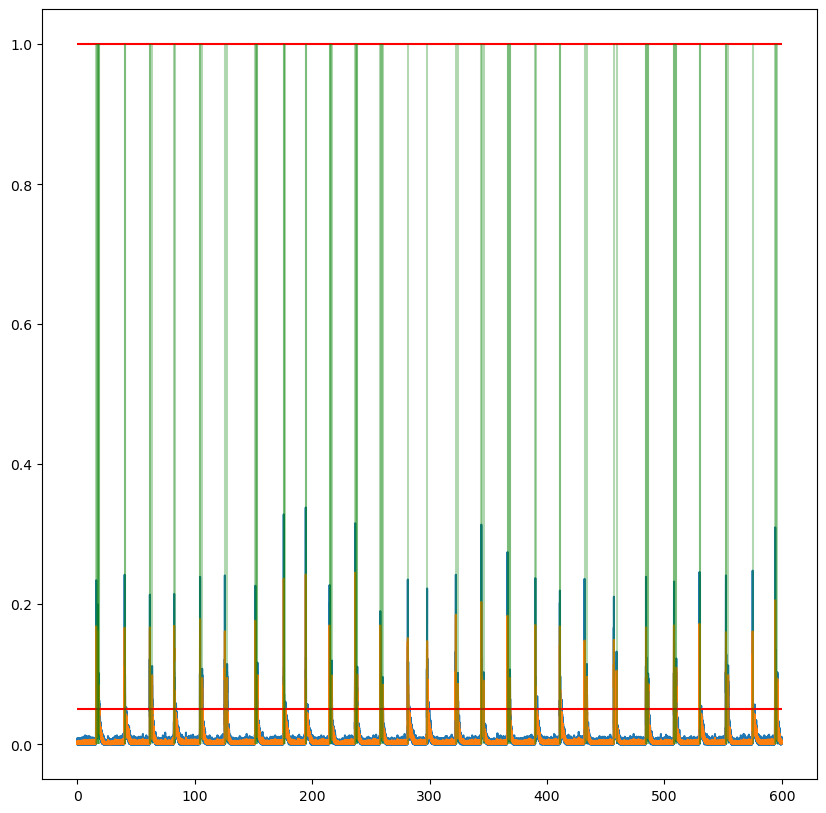

burst found in bin 1633 (time 16.10 s)
burst found in bin 1663 (time 16.40 s)
burst found in bin 1744 (time 17.21 s)
burst found in bin 1774 (time 17.51 s)
burst found in bin 1835 (time 18.12 s)
burst found in bin 1868 (time 18.45 s)
burst found in bin 4051 (time 40.28 s)
burst found in bin 4081 (time 40.58 s)
burst found in bin 6202 (time 61.79 s)
burst found in bin 6232 (time 62.09 s)
burst found in bin 6388 (time 63.65 s)
burst found in bin 8269 (time 82.46 s)
burst found in bin 8300 (time 82.77 s)
burst found in bin 10475 (time 104.52 s)
burst found in bin 10505 (time 104.82 s)
burst found in bin 10650 (time 106.27 s)
burst found in bin 12587 (time 125.64 s)
burst found in bin 12776 (time 127.53 s)
burst found in bin 15183 (time 151.60 s)
burst found in bin 15213 (time 151.90 s)
burst found in bin 15307 (time 152.84 s)
burst found in bin 15360 (time 153.37 s)
burst found in bin 17601 (time 175.78 s)
burst found in bin 17631 (time 176.08 s)
burst found in bin 17720 (time 176.97 s)
b

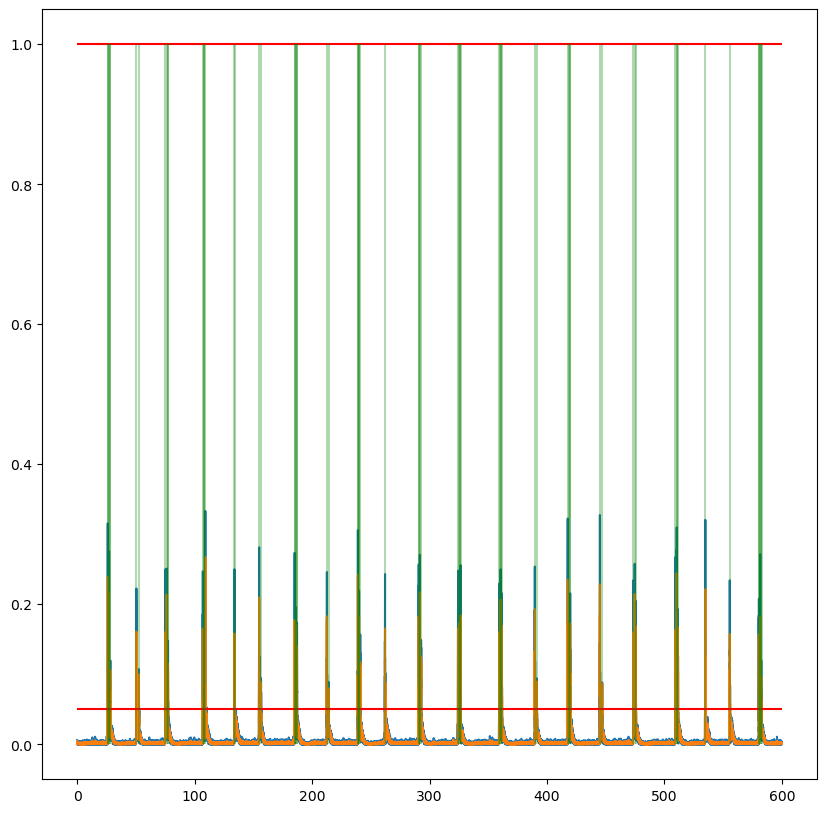

burst found in bin 2611 (time 25.89 s)
burst found in bin 2641 (time 26.19 s)
burst found in bin 2721 (time 26.99 s)
burst found in bin 2795 (time 27.73 s)
burst found in bin 2834 (time 28.12 s)
burst found in bin 5054 (time 50.32 s)
burst found in bin 5260 (time 52.38 s)
burst found in bin 7524 (time 75.02 s)
burst found in bin 7631 (time 76.09 s)
burst found in bin 7702 (time 76.80 s)
burst found in bin 7733 (time 77.11 s)
burst found in bin 10707 (time 106.85 s)
burst found in bin 10814 (time 107.92 s)
burst found in bin 10846 (time 108.24 s)
burst found in bin 10926 (time 109.04 s)
burst found in bin 13400 (time 133.78 s)
burst found in bin 13431 (time 134.09 s)
burst found in bin 15505 (time 154.83 s)
burst found in bin 15664 (time 156.42 s)
burst found in bin 18523 (time 185.01 s)
burst found in bin 18553 (time 185.31 s)
burst found in bin 18624 (time 186.02 s)
burst found in bin 18694 (time 186.72 s)
burst found in bin 18728 (time 187.06 s)
burst found in bin 21275 (time 212.53 

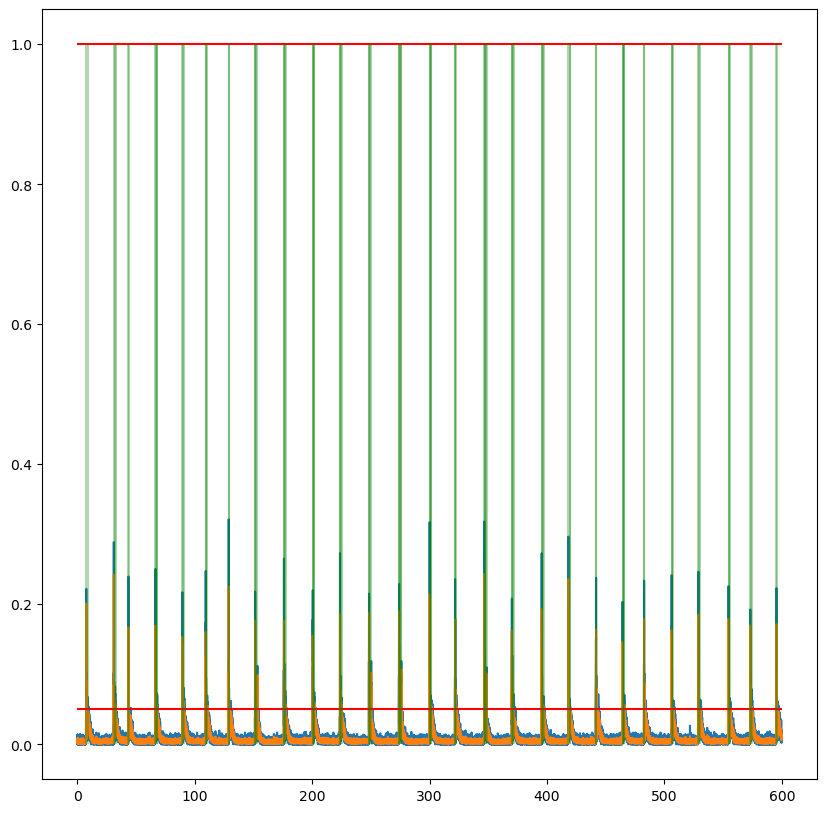

burst found in bin 785 (time 7.62 s)
burst found in bin 914 (time 8.91 s)
burst found in bin 3129 (time 31.06 s)
burst found in bin 3235 (time 32.12 s)
burst found in bin 3289 (time 32.66 s)
burst found in bin 4374 (time 43.51 s)
burst found in bin 4405 (time 43.82 s)
burst found in bin 6672 (time 66.49 s)
burst found in bin 6703 (time 66.80 s)
burst found in bin 6787 (time 67.64 s)
burst found in bin 6824 (time 68.01 s)
burst found in bin 8962 (time 89.39 s)
burst found in bin 8992 (time 89.69 s)
burst found in bin 9086 (time 90.63 s)
burst found in bin 10955 (time 109.32 s)
burst found in bin 10986 (time 109.63 s)
burst found in bin 11095 (time 110.72 s)
burst found in bin 12913 (time 128.90 s)
burst found in bin 12943 (time 129.20 s)
burst found in bin 15164 (time 151.41 s)
burst found in bin 15194 (time 151.71 s)
burst found in bin 15279 (time 152.56 s)
burst found in bin 15361 (time 153.38 s)
burst found in bin 17620 (time 175.97 s)
burst found in bin 17650 (time 176.27 s)
burst f

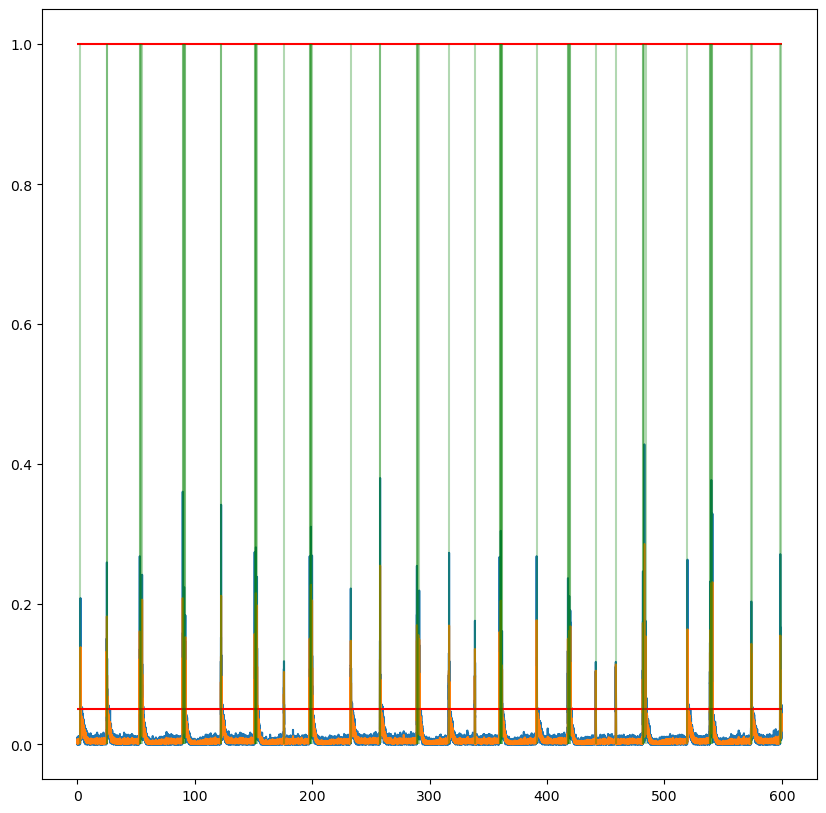

burst found in bin 291 (time 2.68 s)
burst found in bin 2537 (time 25.14 s)
burst found in bin 2568 (time 25.45 s)
burst found in bin 5334 (time 53.11 s)
burst found in bin 5364 (time 53.41 s)
burst found in bin 5444 (time 54.21 s)
burst found in bin 5537 (time 55.14 s)
burst found in bin 8998 (time 89.75 s)
burst found in bin 9029 (time 90.06 s)
burst found in bin 9119 (time 90.96 s)
burst found in bin 9149 (time 91.26 s)
burst found in bin 9219 (time 91.96 s)
burst found in bin 12266 (time 122.43 s)
burst found in bin 12296 (time 122.73 s)
burst found in bin 15124 (time 151.01 s)
burst found in bin 15158 (time 151.35 s)
burst found in bin 15229 (time 152.06 s)
burst found in bin 15259 (time 152.36 s)
burst found in bin 15321 (time 152.98 s)
burst found in bin 17622 (time 175.99 s)
burst found in bin 19811 (time 197.88 s)
burst found in bin 19846 (time 198.23 s)
burst found in bin 19918 (time 198.95 s)
burst found in bin 19948 (time 199.25 s)
burst found in bin 20010 (time 199.87 s)
b

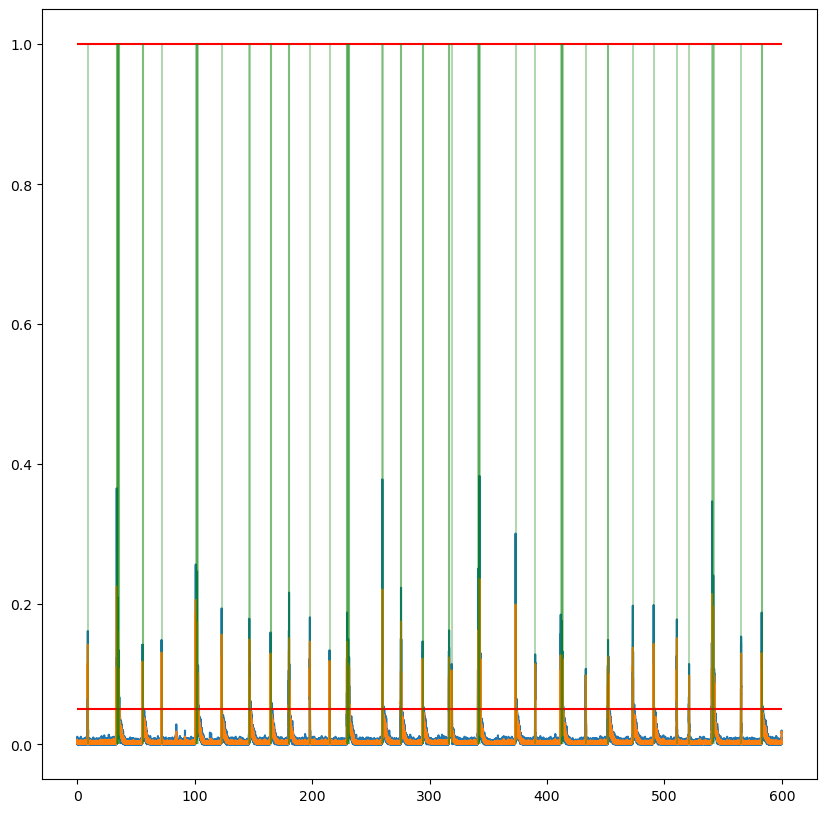

burst found in bin 915 (time 8.92 s)
burst found in bin 3378 (time 33.55 s)
burst found in bin 3408 (time 33.85 s)
burst found in bin 3470 (time 34.47 s)
burst found in bin 3500 (time 34.77 s)
burst found in bin 3554 (time 35.31 s)
burst found in bin 3590 (time 35.67 s)
burst found in bin 5574 (time 55.51 s)
burst found in bin 5605 (time 55.82 s)
burst found in bin 7191 (time 71.68 s)
burst found in bin 10107 (time 100.84 s)
burst found in bin 10217 (time 101.94 s)
burst found in bin 10247 (time 102.24 s)
burst found in bin 10300 (time 102.77 s)
burst found in bin 12312 (time 122.89 s)
burst found in bin 14666 (time 146.43 s)
burst found in bin 14696 (time 146.73 s)
burst found in bin 16475 (time 164.52 s)
burst found in bin 16505 (time 164.82 s)
burst found in bin 18053 (time 180.30 s)
burst found in bin 18084 (time 180.61 s)
burst found in bin 19827 (time 198.04 s)
burst found in bin 21498 (time 214.75 s)
burst found in bin 22991 (time 229.68 s)
burst found in bin 23021 (time 229.98 

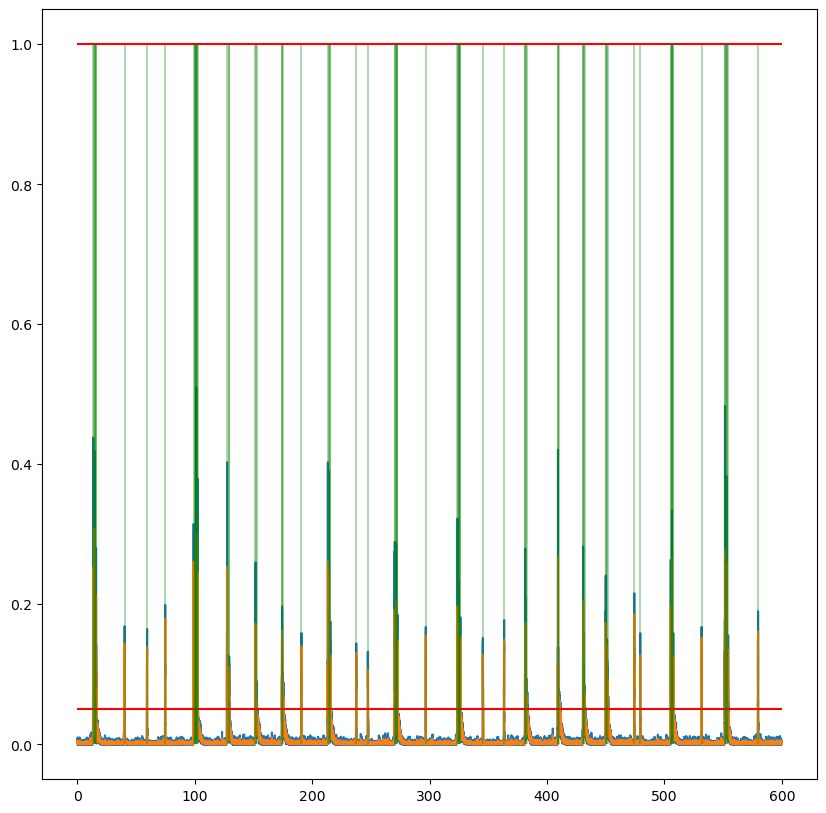

burst found in bin 1383 (time 13.60 s)
burst found in bin 1414 (time 13.91 s)
burst found in bin 1495 (time 14.72 s)
burst found in bin 1525 (time 15.02 s)
burst found in bin 1581 (time 15.58 s)
burst found in bin 1615 (time 15.92 s)
burst found in bin 4047 (time 40.24 s)
burst found in bin 5963 (time 59.40 s)
burst found in bin 7506 (time 74.83 s)
burst found in bin 9923 (time 99.00 s)
burst found in bin 10014 (time 99.91 s)
burst found in bin 10048 (time 100.25 s)
burst found in bin 10089 (time 100.66 s)
burst found in bin 10121 (time 100.98 s)
burst found in bin 10153 (time 101.30 s)
burst found in bin 10183 (time 101.60 s)
burst found in bin 10233 (time 102.10 s)
burst found in bin 10273 (time 102.50 s)
burst found in bin 12775 (time 127.52 s)
burst found in bin 12908 (time 128.85 s)
burst found in bin 12950 (time 129.27 s)
burst found in bin 15192 (time 151.69 s)
burst found in bin 15222 (time 151.99 s)
burst found in bin 15305 (time 152.82 s)
burst found in bin 17453 (time 174.30

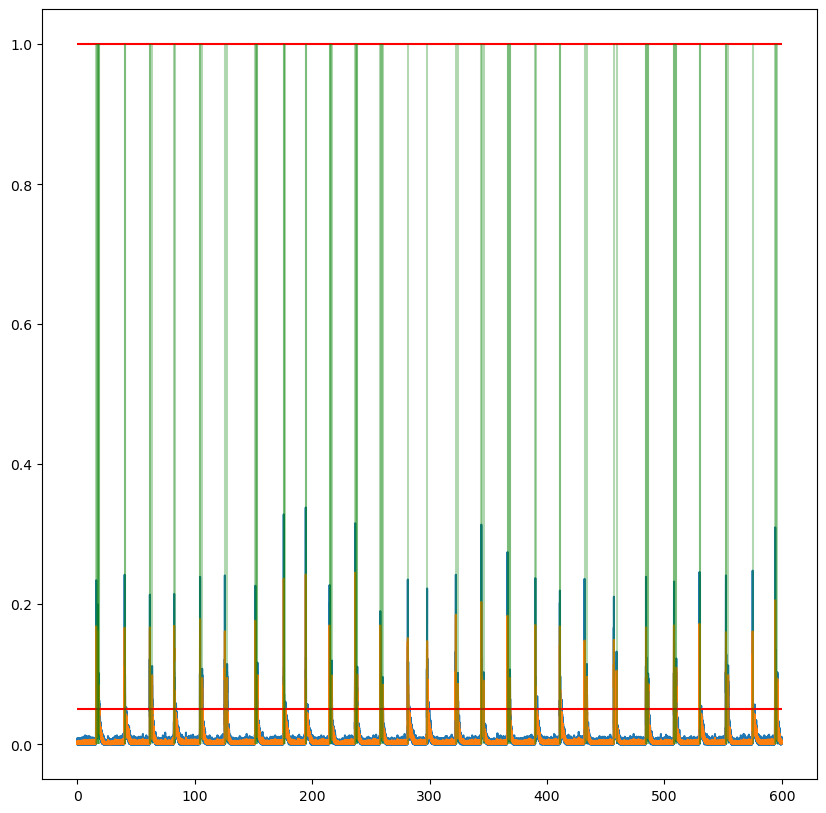

burst found in bin 1633 (time 16.10 s)
burst found in bin 1663 (time 16.40 s)
burst found in bin 1744 (time 17.21 s)
burst found in bin 1774 (time 17.51 s)
burst found in bin 1835 (time 18.12 s)
burst found in bin 1868 (time 18.45 s)
burst found in bin 4051 (time 40.28 s)
burst found in bin 4081 (time 40.58 s)
burst found in bin 6202 (time 61.79 s)
burst found in bin 6232 (time 62.09 s)
burst found in bin 6388 (time 63.65 s)
burst found in bin 8269 (time 82.46 s)
burst found in bin 8300 (time 82.77 s)
burst found in bin 10475 (time 104.52 s)
burst found in bin 10505 (time 104.82 s)
burst found in bin 10650 (time 106.27 s)
burst found in bin 12587 (time 125.64 s)
burst found in bin 12776 (time 127.53 s)
burst found in bin 15183 (time 151.60 s)
burst found in bin 15213 (time 151.90 s)
burst found in bin 15307 (time 152.84 s)
burst found in bin 15360 (time 153.37 s)
burst found in bin 17601 (time 175.78 s)
burst found in bin 17631 (time 176.08 s)
burst found in bin 17720 (time 176.97 s)
b

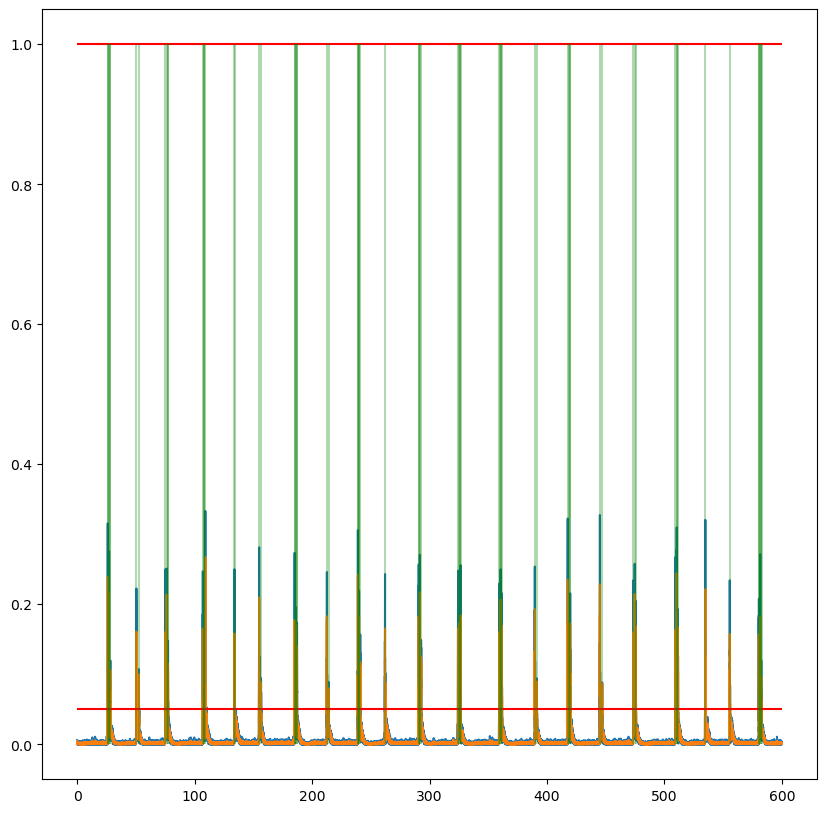

burst found in bin 2611 (time 25.89 s)
burst found in bin 2641 (time 26.19 s)
burst found in bin 2721 (time 26.99 s)
burst found in bin 2795 (time 27.73 s)
burst found in bin 2834 (time 28.12 s)
burst found in bin 5054 (time 50.32 s)
burst found in bin 5260 (time 52.38 s)
burst found in bin 7524 (time 75.02 s)
burst found in bin 7631 (time 76.09 s)
burst found in bin 7702 (time 76.80 s)
burst found in bin 7733 (time 77.11 s)
burst found in bin 10707 (time 106.85 s)
burst found in bin 10814 (time 107.92 s)
burst found in bin 10846 (time 108.24 s)
burst found in bin 10926 (time 109.04 s)
burst found in bin 13400 (time 133.78 s)
burst found in bin 13431 (time 134.09 s)
burst found in bin 15505 (time 154.83 s)
burst found in bin 15664 (time 156.42 s)
burst found in bin 18523 (time 185.01 s)
burst found in bin 18553 (time 185.31 s)
burst found in bin 18624 (time 186.02 s)
burst found in bin 18694 (time 186.72 s)
burst found in bin 18728 (time 187.06 s)
burst found in bin 21275 (time 212.53 

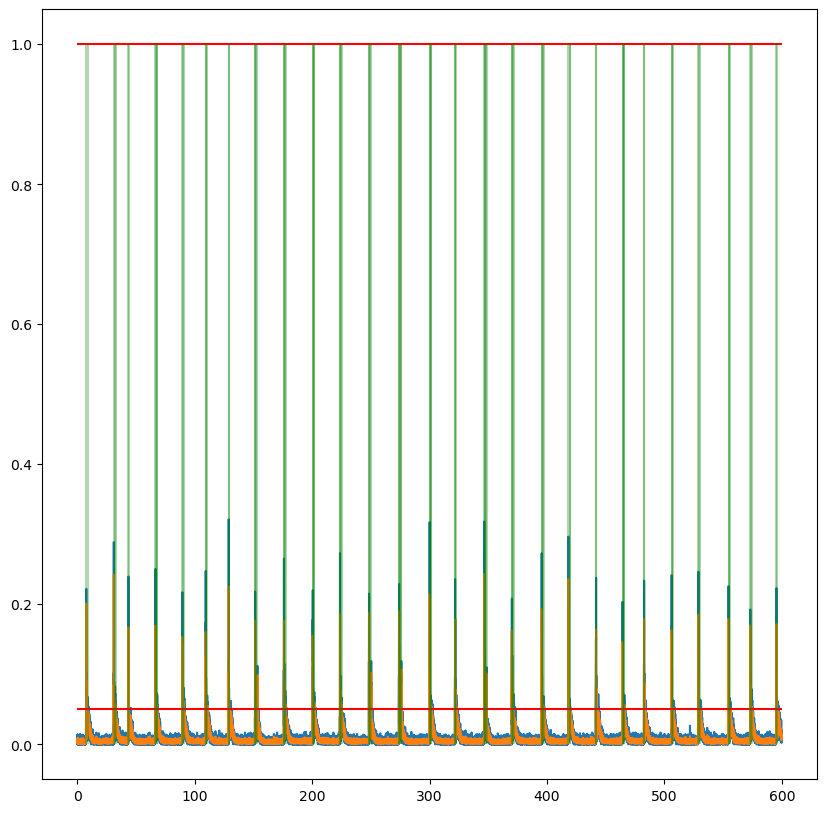

burst found in bin 785 (time 7.62 s)
burst found in bin 914 (time 8.91 s)
burst found in bin 3129 (time 31.06 s)
burst found in bin 3235 (time 32.12 s)
burst found in bin 3289 (time 32.66 s)
burst found in bin 4374 (time 43.51 s)
burst found in bin 4405 (time 43.82 s)
burst found in bin 6672 (time 66.49 s)
burst found in bin 6703 (time 66.80 s)
burst found in bin 6787 (time 67.64 s)
burst found in bin 6824 (time 68.01 s)
burst found in bin 8962 (time 89.39 s)
burst found in bin 8992 (time 89.69 s)
burst found in bin 9086 (time 90.63 s)
burst found in bin 10955 (time 109.32 s)
burst found in bin 10986 (time 109.63 s)
burst found in bin 11095 (time 110.72 s)
burst found in bin 12913 (time 128.90 s)
burst found in bin 12943 (time 129.20 s)
burst found in bin 15164 (time 151.41 s)
burst found in bin 15194 (time 151.71 s)
burst found in bin 15279 (time 152.56 s)
burst found in bin 15361 (time 153.38 s)
burst found in bin 17620 (time 175.97 s)
burst found in bin 17650 (time 176.27 s)
burst f

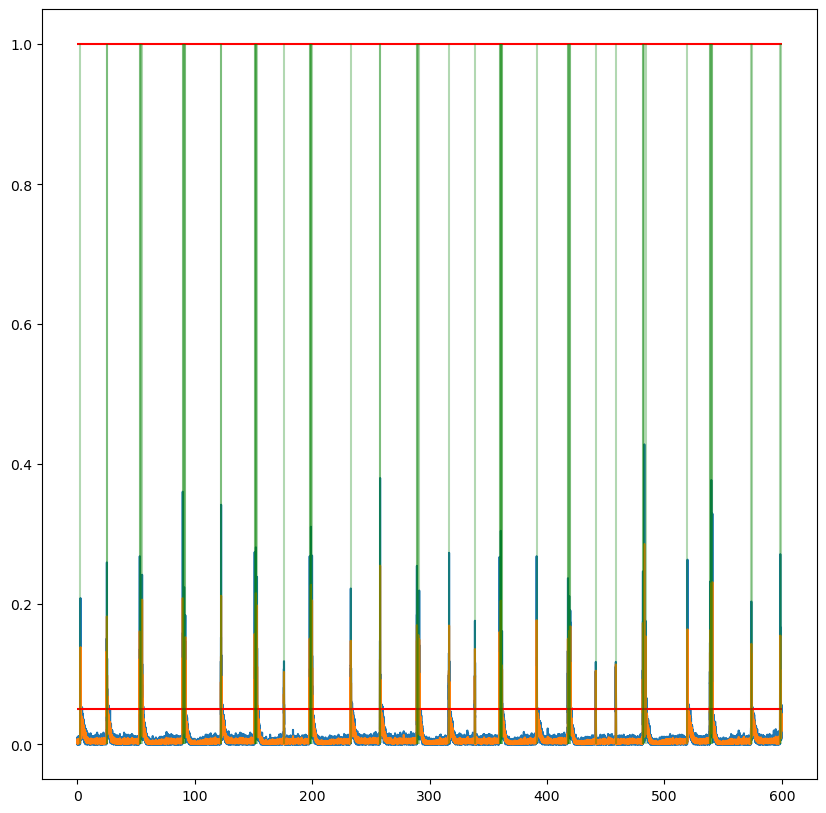

burst found in bin 291 (time 2.68 s)
burst found in bin 2537 (time 25.14 s)
burst found in bin 2568 (time 25.45 s)
burst found in bin 5334 (time 53.11 s)
burst found in bin 5364 (time 53.41 s)
burst found in bin 5444 (time 54.21 s)
burst found in bin 5537 (time 55.14 s)
burst found in bin 8998 (time 89.75 s)
burst found in bin 9029 (time 90.06 s)
burst found in bin 9119 (time 90.96 s)
burst found in bin 9149 (time 91.26 s)
burst found in bin 9219 (time 91.96 s)
burst found in bin 12266 (time 122.43 s)
burst found in bin 12296 (time 122.73 s)
burst found in bin 15124 (time 151.01 s)
burst found in bin 15158 (time 151.35 s)
burst found in bin 15229 (time 152.06 s)
burst found in bin 15259 (time 152.36 s)
burst found in bin 15321 (time 152.98 s)
burst found in bin 17622 (time 175.99 s)
burst found in bin 19811 (time 197.88 s)
burst found in bin 19846 (time 198.23 s)
burst found in bin 19918 (time 198.95 s)
burst found in bin 19948 (time 199.25 s)
burst found in bin 20010 (time 199.87 s)
b

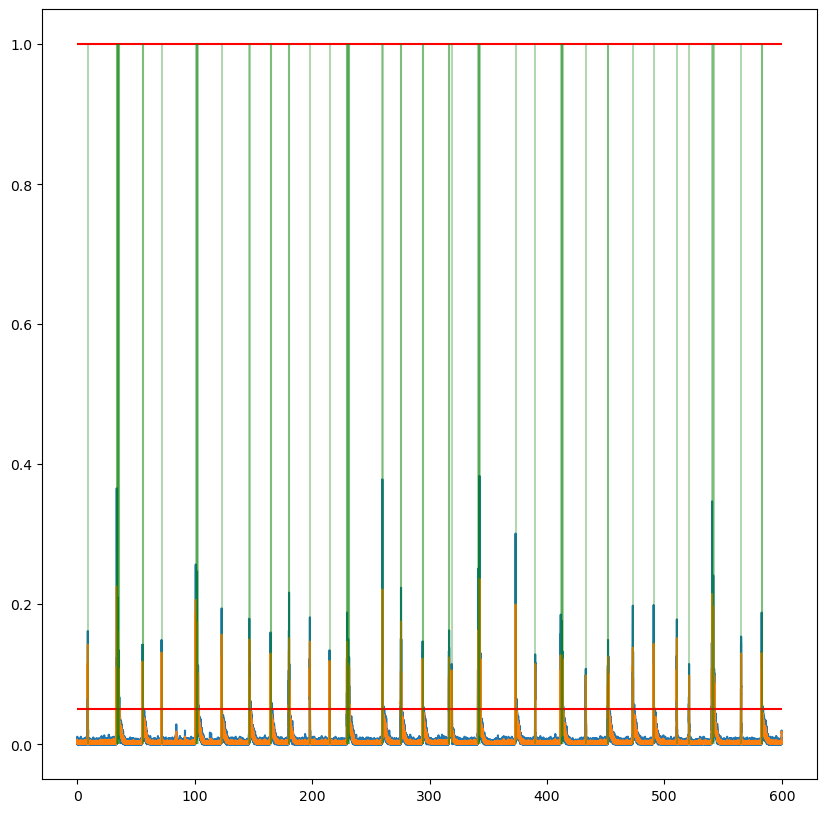

burst found in bin 915 (time 8.92 s)
burst found in bin 3378 (time 33.55 s)
burst found in bin 3408 (time 33.85 s)
burst found in bin 3470 (time 34.47 s)
burst found in bin 3500 (time 34.77 s)
burst found in bin 3554 (time 35.31 s)
burst found in bin 3590 (time 35.67 s)
burst found in bin 5574 (time 55.51 s)
burst found in bin 5605 (time 55.82 s)
burst found in bin 7191 (time 71.68 s)
burst found in bin 10107 (time 100.84 s)
burst found in bin 10217 (time 101.94 s)
burst found in bin 10247 (time 102.24 s)
burst found in bin 10300 (time 102.77 s)
burst found in bin 12312 (time 122.89 s)
burst found in bin 14666 (time 146.43 s)
burst found in bin 14696 (time 146.73 s)
burst found in bin 16475 (time 164.52 s)
burst found in bin 16505 (time 164.82 s)
burst found in bin 18053 (time 180.30 s)
burst found in bin 18084 (time 180.61 s)
burst found in bin 19827 (time 198.04 s)
burst found in bin 21498 (time 214.75 s)
burst found in bin 22991 (time 229.68 s)
burst found in bin 23021 (time 229.98 

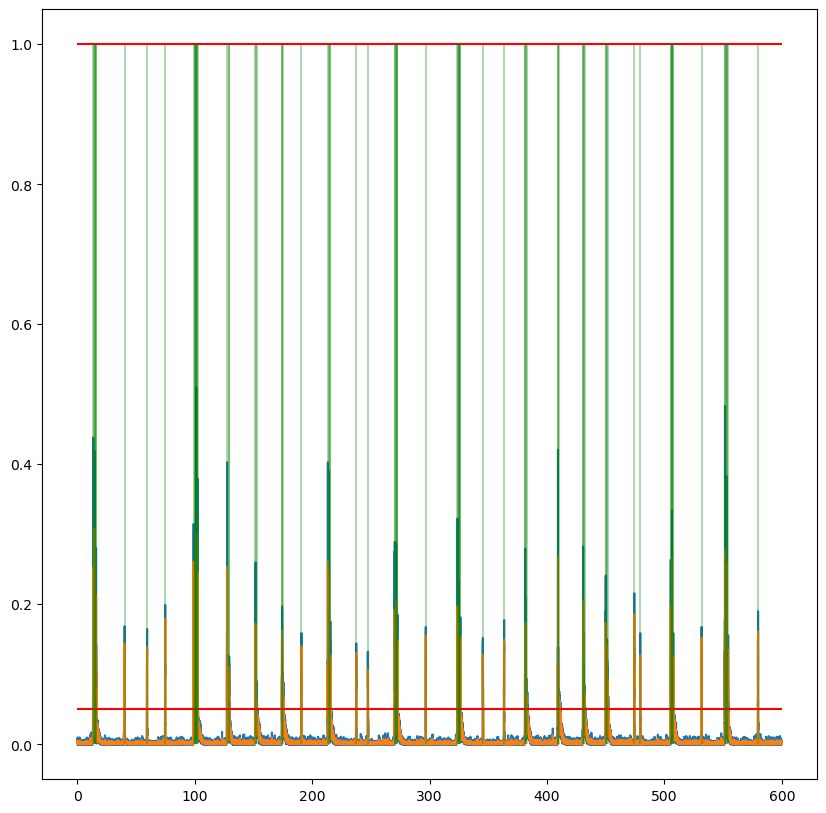

burst found in bin 1383 (time 13.60 s)
burst found in bin 1414 (time 13.91 s)
burst found in bin 1495 (time 14.72 s)
burst found in bin 1525 (time 15.02 s)
burst found in bin 1581 (time 15.58 s)
burst found in bin 1615 (time 15.92 s)
burst found in bin 4047 (time 40.24 s)
burst found in bin 5963 (time 59.40 s)
burst found in bin 7506 (time 74.83 s)
burst found in bin 9923 (time 99.00 s)
burst found in bin 10014 (time 99.91 s)
burst found in bin 10048 (time 100.25 s)
burst found in bin 10089 (time 100.66 s)
burst found in bin 10121 (time 100.98 s)
burst found in bin 10153 (time 101.30 s)
burst found in bin 10183 (time 101.60 s)
burst found in bin 10233 (time 102.10 s)
burst found in bin 10273 (time 102.50 s)
burst found in bin 12775 (time 127.52 s)
burst found in bin 12908 (time 128.85 s)
burst found in bin 12950 (time 129.27 s)
burst found in bin 15192 (time 151.69 s)
burst found in bin 15222 (time 151.99 s)
burst found in bin 15305 (time 152.82 s)
burst found in bin 17453 (time 174.30

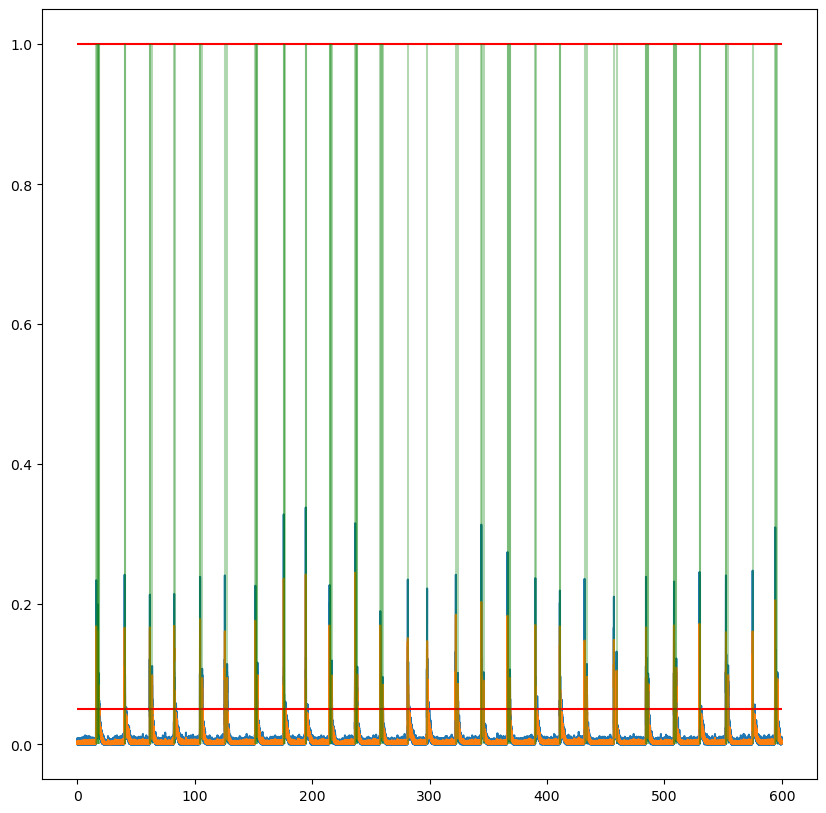

burst found in bin 1633 (time 16.10 s)
burst found in bin 1663 (time 16.40 s)
burst found in bin 1744 (time 17.21 s)
burst found in bin 1774 (time 17.51 s)
burst found in bin 1835 (time 18.12 s)
burst found in bin 1868 (time 18.45 s)
burst found in bin 4051 (time 40.28 s)
burst found in bin 4081 (time 40.58 s)
burst found in bin 6202 (time 61.79 s)
burst found in bin 6232 (time 62.09 s)
burst found in bin 6388 (time 63.65 s)
burst found in bin 8269 (time 82.46 s)
burst found in bin 8300 (time 82.77 s)
burst found in bin 10475 (time 104.52 s)
burst found in bin 10505 (time 104.82 s)
burst found in bin 10650 (time 106.27 s)
burst found in bin 12587 (time 125.64 s)
burst found in bin 12776 (time 127.53 s)
burst found in bin 15183 (time 151.60 s)
burst found in bin 15213 (time 151.90 s)
burst found in bin 15307 (time 152.84 s)
burst found in bin 15360 (time 153.37 s)
burst found in bin 17601 (time 175.78 s)
burst found in bin 17631 (time 176.08 s)
burst found in bin 17720 (time 176.97 s)
b

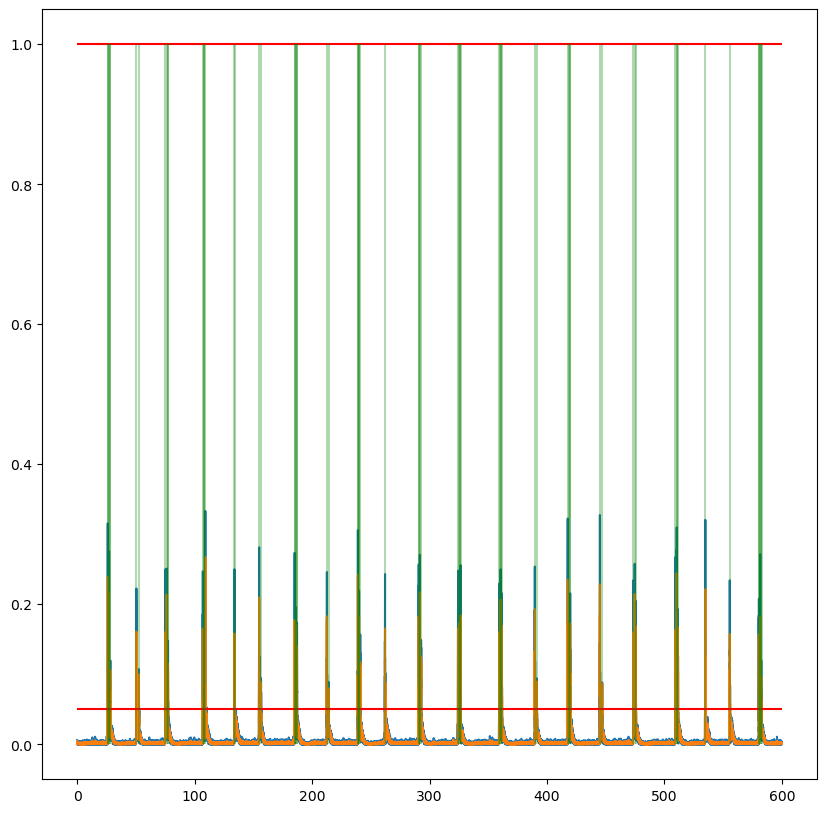

burst found in bin 2611 (time 25.89 s)
burst found in bin 2641 (time 26.19 s)
burst found in bin 2721 (time 26.99 s)
burst found in bin 2795 (time 27.73 s)
burst found in bin 2834 (time 28.12 s)
burst found in bin 5054 (time 50.32 s)
burst found in bin 5260 (time 52.38 s)
burst found in bin 7524 (time 75.02 s)
burst found in bin 7631 (time 76.09 s)
burst found in bin 7702 (time 76.80 s)
burst found in bin 7733 (time 77.11 s)
burst found in bin 10707 (time 106.85 s)
burst found in bin 10814 (time 107.92 s)
burst found in bin 10846 (time 108.24 s)
burst found in bin 10926 (time 109.04 s)
burst found in bin 13400 (time 133.78 s)
burst found in bin 13431 (time 134.09 s)
burst found in bin 15505 (time 154.83 s)
burst found in bin 15664 (time 156.42 s)
burst found in bin 18523 (time 185.01 s)
burst found in bin 18553 (time 185.31 s)
burst found in bin 18624 (time 186.02 s)
burst found in bin 18694 (time 186.72 s)
burst found in bin 18728 (time 187.06 s)
burst found in bin 21275 (time 212.53 

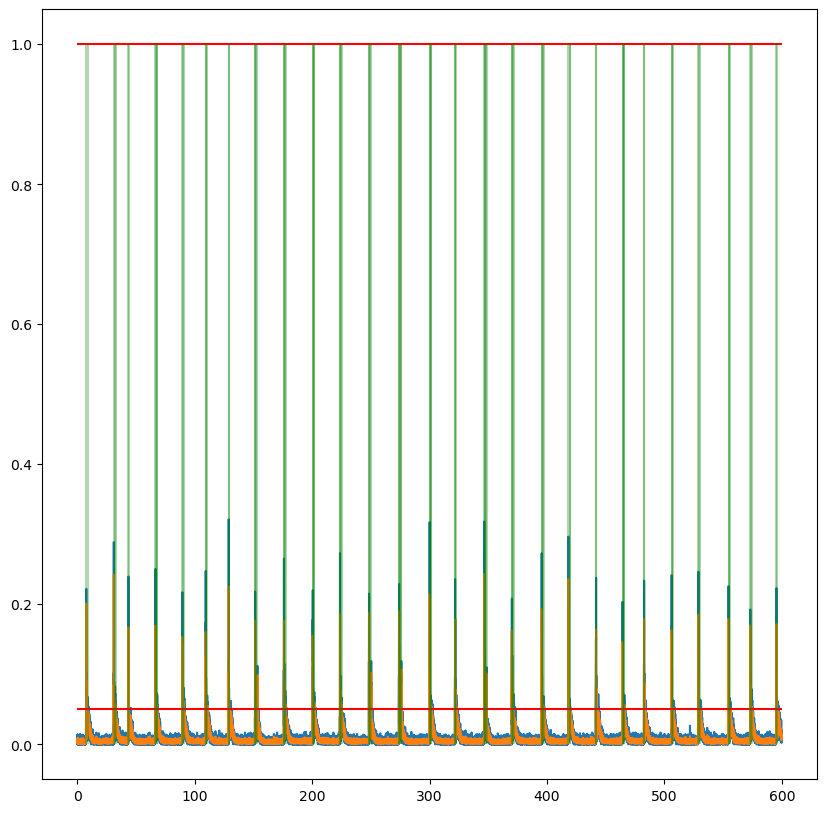

burst found in bin 785 (time 7.62 s)
burst found in bin 914 (time 8.91 s)
burst found in bin 3129 (time 31.06 s)
burst found in bin 3235 (time 32.12 s)
burst found in bin 3289 (time 32.66 s)
burst found in bin 4374 (time 43.51 s)
burst found in bin 4405 (time 43.82 s)
burst found in bin 6672 (time 66.49 s)
burst found in bin 6703 (time 66.80 s)
burst found in bin 6787 (time 67.64 s)
burst found in bin 6824 (time 68.01 s)
burst found in bin 8962 (time 89.39 s)
burst found in bin 8992 (time 89.69 s)
burst found in bin 9086 (time 90.63 s)
burst found in bin 10955 (time 109.32 s)
burst found in bin 10986 (time 109.63 s)
burst found in bin 11095 (time 110.72 s)
burst found in bin 12913 (time 128.90 s)
burst found in bin 12943 (time 129.20 s)
burst found in bin 15164 (time 151.41 s)
burst found in bin 15194 (time 151.71 s)
burst found in bin 15279 (time 152.56 s)
burst found in bin 15361 (time 153.38 s)
burst found in bin 17620 (time 175.97 s)
burst found in bin 17650 (time 176.27 s)
burst f

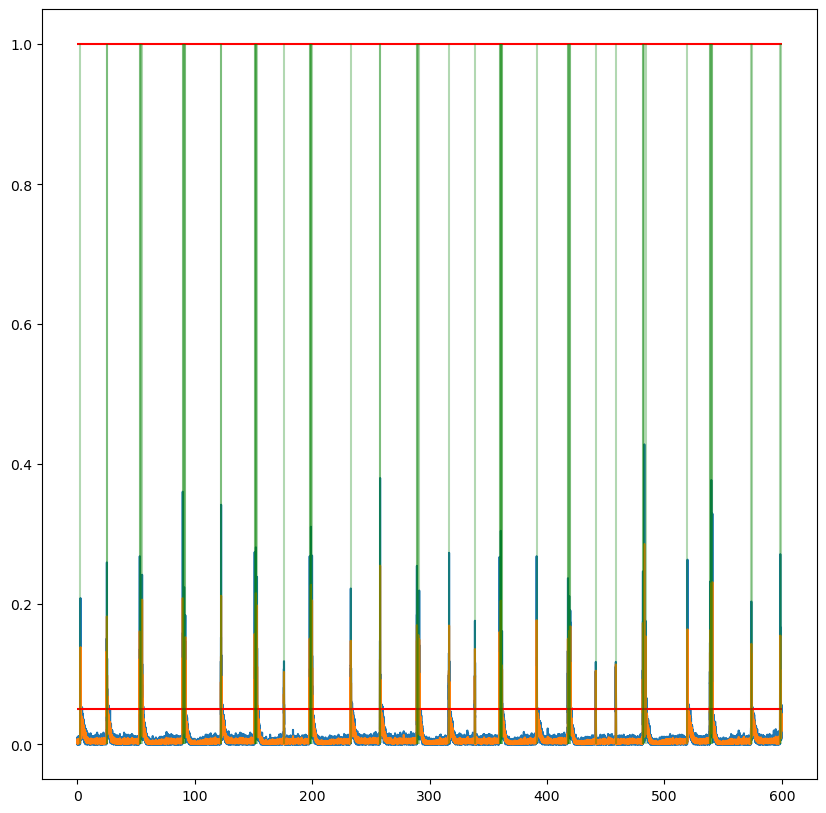

burst found in bin 291 (time 2.68 s)
burst found in bin 2537 (time 25.14 s)
burst found in bin 2568 (time 25.45 s)
burst found in bin 5334 (time 53.11 s)
burst found in bin 5364 (time 53.41 s)
burst found in bin 5444 (time 54.21 s)
burst found in bin 5537 (time 55.14 s)
burst found in bin 8998 (time 89.75 s)
burst found in bin 9029 (time 90.06 s)
burst found in bin 9119 (time 90.96 s)
burst found in bin 9149 (time 91.26 s)
burst found in bin 9219 (time 91.96 s)
burst found in bin 12266 (time 122.43 s)
burst found in bin 12296 (time 122.73 s)
burst found in bin 15124 (time 151.01 s)
burst found in bin 15158 (time 151.35 s)
burst found in bin 15229 (time 152.06 s)
burst found in bin 15259 (time 152.36 s)
burst found in bin 15321 (time 152.98 s)
burst found in bin 17622 (time 175.99 s)
burst found in bin 19811 (time 197.88 s)
burst found in bin 19846 (time 198.23 s)
burst found in bin 19918 (time 198.95 s)
burst found in bin 19948 (time 199.25 s)
burst found in bin 20010 (time 199.87 s)
b

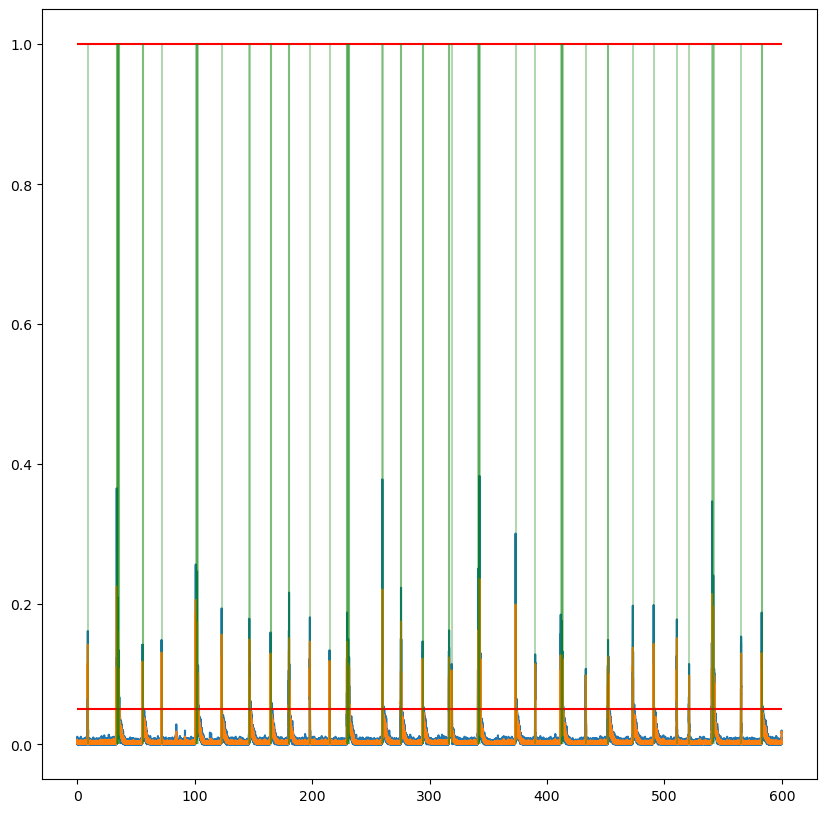

burst found in bin 915 (time 8.92 s)
burst found in bin 3378 (time 33.55 s)
burst found in bin 3408 (time 33.85 s)
burst found in bin 3470 (time 34.47 s)
burst found in bin 3500 (time 34.77 s)
burst found in bin 3554 (time 35.31 s)
burst found in bin 3590 (time 35.67 s)
burst found in bin 5574 (time 55.51 s)
burst found in bin 5605 (time 55.82 s)
burst found in bin 7191 (time 71.68 s)
burst found in bin 10107 (time 100.84 s)
burst found in bin 10217 (time 101.94 s)
burst found in bin 10247 (time 102.24 s)
burst found in bin 10300 (time 102.77 s)
burst found in bin 12312 (time 122.89 s)
burst found in bin 14666 (time 146.43 s)
burst found in bin 14696 (time 146.73 s)
burst found in bin 16475 (time 164.52 s)
burst found in bin 16505 (time 164.82 s)
burst found in bin 18053 (time 180.30 s)
burst found in bin 18084 (time 180.61 s)
burst found in bin 19827 (time 198.04 s)
burst found in bin 21498 (time 214.75 s)
burst found in bin 22991 (time 229.68 s)
burst found in bin 23021 (time 229.98 

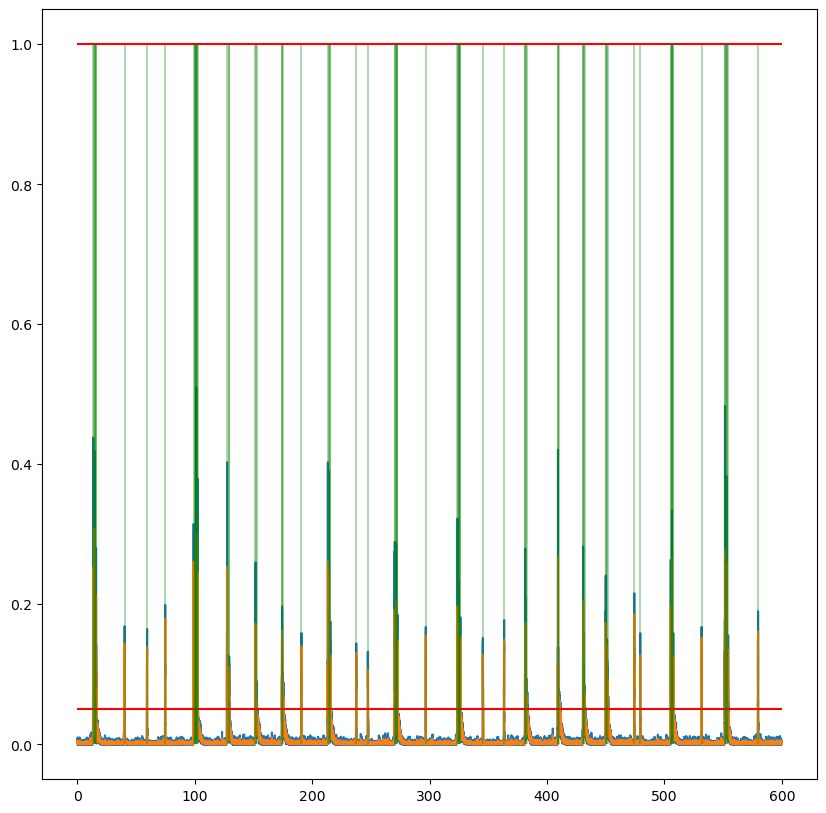

burst found in bin 1383 (time 13.60 s)
burst found in bin 1414 (time 13.91 s)
burst found in bin 1495 (time 14.72 s)
burst found in bin 1525 (time 15.02 s)
burst found in bin 1581 (time 15.58 s)
burst found in bin 1615 (time 15.92 s)
burst found in bin 4047 (time 40.24 s)
burst found in bin 5963 (time 59.40 s)
burst found in bin 7506 (time 74.83 s)
burst found in bin 9923 (time 99.00 s)
burst found in bin 10014 (time 99.91 s)
burst found in bin 10048 (time 100.25 s)
burst found in bin 10089 (time 100.66 s)
burst found in bin 10121 (time 100.98 s)
burst found in bin 10153 (time 101.30 s)
burst found in bin 10183 (time 101.60 s)
burst found in bin 10233 (time 102.10 s)
burst found in bin 10273 (time 102.50 s)
burst found in bin 12775 (time 127.52 s)
burst found in bin 12908 (time 128.85 s)
burst found in bin 12950 (time 129.27 s)
burst found in bin 15192 (time 151.69 s)
burst found in bin 15222 (time 151.99 s)
burst found in bin 15305 (time 152.82 s)
burst found in bin 17453 (time 174.30

In [4]:
homedir=os.path.expanduser("~")
chip_id = "M07458"
recording_no = 0

process_post = True
divs = [12, 14, 21, 22, 23, 26]
for div in divs:
    for well_no in range(0, 6):
        r_drive = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/"
        pre_trial_filepath = r_drive + f"Experimental Data/Summer 2024/stim_removal/null data/{chip_id} DIV{div}/Network/"

        filepath = pre_trial_filepath + f"{max(os.listdir(pre_trial_filepath))}/"

        filename = f"data"
        filetag = ".raw.h5"
        datapath = homedir + "/temp/"

        pre_time = 0

        train_time = 600

        post_time = 1200



        #PROCESS POST DATA
        if process_post and not list(control_postprocessing_df.index).count([chip_id, div, well_no]) >= 1:
            burst_list = burst.find_bursts(filepath, filename, well_no, recording_no, datapath = datapath, stim_thresh = 1, burst_thresh = 0.05)


            burst_list_pre = list()
            burst_list_pre_directions = list()
            burst_list_train = list()
            burst_list_train_directions = list()
            burst_list_post = list()
            burst_list_post_directions = list()
            for i in burst_list:
                if train_time > i.time > pre_time:
                    burst_list_pre.append(i)
                    burst_list_pre_directions.append(i.direction(0.05))
                elif post_time > i.time > train_time:
                    continue
                elif post_time < i.time:  
                    continue

            burst_list_pre_directions = np.array(burst_list_pre_directions)
            burst_list_train_directions = np.array(burst_list_train_directions)
            burst_list_post_directions = np.array(burst_list_post_directions)


            pre = ((burst_list_pre_directions > 0).astype(int))
            train = ((burst_list_train_directions > 0).astype(int))
            post = ((burst_list_post_directions > 0).astype(int))
            control_postprocessing_df.loc[(chip_id, div, well_no), :] = [np.sum(pre), len(pre), np.sum(train), len(train), np.sum(post), len(post)]


In [5]:
control_postprocessing_df

pre postprocessing l->r pre postprocessing total  \
chip   div well                                                    
M07458 12  0                         40                       75   
           1                         45                       69   
           2                         27                       89   
           3                         30                       62   
           4                         30                       60   
           5                         20                       81   
       14  0                         38                       75   
           1                         43                       69   
           2                         26                       89   
           3                         28                       62   
           4                         32                       60   
           5                         24                       81   
       21  0                         39                       75   
           1                         43                       69   
           2                         26                       89   
           3                         31                       62   
           4                         32                       60   
           5                         23                       81   
       22  0                         34                       75   
           1                         46                       69   
           2                         29                       89   
           3                         34                       62   
           4                         31                       60   
           5                         22                       81   
       23  0                         41                       75   
           1                         43                       69   
           2                         27                       89   
           3                         34                       62   
           4                         33                       60   
           5                         23                       81   
       26  0                         33                       75   
           1                         43                       69   
           2                         34                       89   
           3                         36                       62   
           4                         28                       60   
           5                         20                       81   

                train postprocessing l->r train postprocessing total  \
chip   div well                                                        
M07458 12  0                            0                          0   
           1                            0                          0   
           2                            0                          0   
           3                            0                          0   
           4                            0                          0   
           5                            0                          0   
       14  0                            0                          0   
           1                            0                          0   
           2                            0                          0   
           3                            0                          0   
           4                            0                          0   
           5                            0                          0   
       21  0                            0                          0   
           1                            0                          0   
           2                            0                          0   
           3                            0                          0   
           4                            0                          0   
           5                            0                      

In [7]:


control_differences_df = pd.DataFrame(columns = ["chip", "div", "well", "proportion change"]).set_index(["chip", "div", "well"])

for i, div in enumerate(divs[1:]):
    for well in range(0, 6):
        previous_prop =control_postprocessing_df.loc[(chip_id, divs[i], well), "pre postprocessing l->r"] / control_postprocessing_df.loc[(chip_id, divs[i], well), "pre postprocessing total"] 
        current_prop = control_postprocessing_df.loc[(chip_id, div, well), "pre postprocessing l->r"] / control_postprocessing_df.loc[(chip_id, div, well), "pre postprocessing total"]
        control_differences_df.loc[chip_id, div,well] = (current_prop - previous_prop)/(div - divs[i])

control_differences_df

proportion change
chip   div well                   
M07458 14  0             -0.013333
           1             -0.014493
           2             -0.005618
           3             -0.016129
           4              0.016667
           5              0.024691
       21  0              0.001905
           1              0.000000
           2              0.000000
           3              0.006912
           4              0.000000
           5             -0.001764
       22  0             -0.066667
           1              0.043478
           2              0.033708
           3              0.048387
           4             -0.016667
           5             -0.012346
       23  0              0.093333
           1             -0.043478
           2             -0.022472
           3              0.000000
           4              0.033333
           5              0.012346
       26  0             -0.035556
           1              0.000000
           2              0.026217
           3              0.010753
           4             -0.027778
           5             -0.012346

Text(0, 0.5, '$\\Delta$ proportion leftwards bursting, per day')

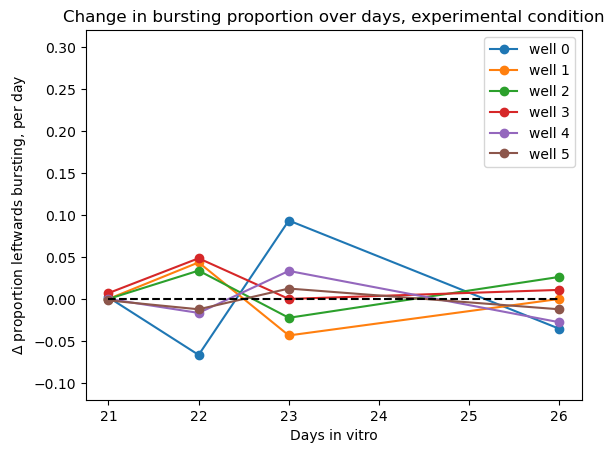

In [8]:
for well_no in range(0, 6):
    plt.plot([21, 22, 23, 26], control_differences_df.loc[("M07458", [21, 22, 23, 26], well_no), "proportion change"], "o-", label = f"well {well_no}")
plt.hlines(0, 21, 26, "k", "dashed")
plt.legend()
plt.title("Change in bursting proportion over days, experimental condition")

plt.ylim([-0.12, 0.32])
plt.xlabel("Days in vitro")
plt.ylabel("$\Delta$ proportion leftwards bursting, per day")

Text(0.5, 0, '$\\Delta$ proportion leftwards bursting, per day')

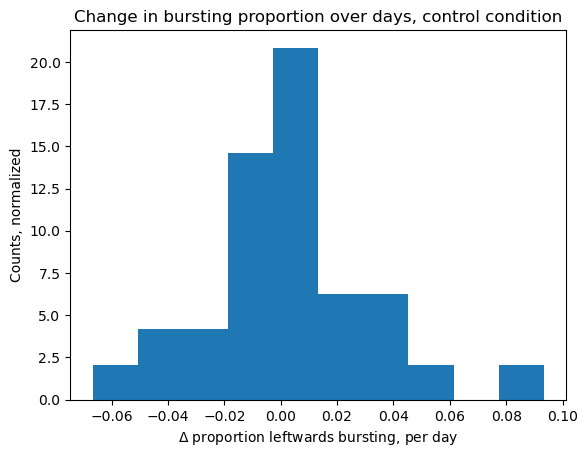

In [9]:
plt.hist(control_differences_df["proportion change"], density = True)
plt.title("Change in bursting proportion over days, control condition")
plt.ylabel("Counts, normalized")
plt.xlabel("$\Delta$ proportion leftwards bursting, per day")

# Experimental

In [8]:

exp_live_df = pd.DataFrame(columns = ["chip", "div", "well", "pre live l->r", "pre live total", "train live l->r", "train live total", "post live l->r", "post live total"])
exp_postprocessing_df = pd.DataFrame(columns = ["chip", "div", "well", "pre postprocessing l->r", "pre postprocessing total", "train postprocessing l->r", "train postprocessing total", "post postprocessing l->r", "post postprocessing total"])

exp_live_df.set_index(["chip","div", "well"], inplace = True)
exp_postprocessing_df.set_index(["chip","div", "well"], inplace = True)
exp_live_df

,,,pre live l->r,pre live total,train live l->r,train live total,post live l->r,post live total
chip,div,well,,,,,,


In [9]:
homedir=os.path.expanduser("~")
chip_id = "M07480"
recording_no = 0

process_post = False
divs = [30, 33, 34, 35, 36, 37, 38, 40]
for div in divs:
    for well_no in range(0, 6):
        r_drive = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/"
        pre_trial_filepath = r_drive + f"Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/{chip_id}/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/"

        filepath = pre_trial_filepath + f"{max(os.listdir(pre_trial_filepath))}/well{str(well_no)}/"

        filename = f"DIV{div}_stim_removal_well_" + str(well_no)
        filetag = ".raw.h5"
        datapath = homedir + "/temp/"

        csv_filename = f"burst_direction_{well_no}.csv"


        if div >= 34:
            events = mla.load_events(filepath + filename + filetag, well_no, recording_no)
        else:
            events = mla.load_events(pre_trial_filepath + f"{max(os.listdir(pre_trial_filepath))}/well5/DIV{div}_stim_removal_well_5.raw.h5", well_no = 5, recording_no=0)

        pre_time = events.loc[events["eventid"] == 2, "time"].values[0]

        train_time = events.loc[events["eventid"] == 3, "time"].values[0]

        post_time = events.loc[events["eventid"] == 4, "time"].values[0]





        #PROCESS LIVE DATA

        burst_directions = list()
        burst_frames = list()
        with open(filepath +csv_filename) as f:
            line_generator = (line.replace('"', '') for line in f)
            for i, row in enumerate(csv.reader(line_generator, delimiter=',')):
                if i % 4 == 1:
                    time = float(row[0])
                    burst_frames.append(time)
                elif i % 4 == 2:
                    direction = row[-1]
                    if direction == " right to left":
                        burst_directions.append(0)
                    elif direction == " left to right":
                        burst_directions.append(1)

        assert len(burst_directions) == len(burst_frames)


        live_burst_list_pre = list()
        live_burst_list_pre_directions = list()
        live_burst_list_train = list()
        live_burst_list_train_directions = list()
        live_burst_list_post = list()
        live_burst_list_post_directions = list()

        for frame, direction in zip(burst_frames, burst_directions):
            if train_time * 10000 > frame + 50000 + 100 > pre_time:
                live_burst_list_pre.append(frame)
                live_burst_list_pre_directions.append(direction)
            elif post_time  * 10000 > frame + 50000 + 100 > train_time:
                live_burst_list_train.append(frame)
                live_burst_list_train_directions.append(direction)
            elif post_time * 10000 < frame + 50000 + 100:  
                live_burst_list_post.append(frame)
                live_burst_list_post_directions.append(direction)

        pre = live_burst_list_pre_directions
        train = live_burst_list_train_directions
        post = live_burst_list_post_directions
        title = f"Live analysis results, {chip_id} DIV {div} well {well_no}"
        #stacked_bar_plot(pre, train, post, title)

        exp_live_df.loc[(chip_id, div, well_no), :] = [np.sum(pre), len(pre), np.sum(train), len(train), np.sum(post), len(post)]






        #PROCESS POST DATA
        if process_post and not list(exp_postprocessing_df.index).count([chip_id, div, well_no]) >= 1:
            burst_list = burst.find_bursts(filepath, filename, well_no, recording_no, datapath = datapath, stim_thresh = 1, burst_thresh = 0.6)


            burst_list_pre = list()
            burst_list_pre_directions = list()
            burst_list_train = list()
            burst_list_train_directions = list()
            burst_list_post = list()
            burst_list_post_directions = list()
            for i in burst_list:
                if train_time > i.time > pre_time:
                    burst_list_pre.append(i)
                    burst_list_pre_directions.append(i.direction(0.2))
                elif post_time > i.time > train_time:
                    burst_list_train.append(i)
                    burst_list_train_directions.append(i.direction(0.2))
                elif post_time < i.time:  
                    burst_list_post.append(i)
                    burst_list_post_directions.append(i.direction(0.2))

            burst_list_pre_directions = np.array(burst_list_pre_directions)
            burst_list_train_directions = np.array(burst_list_train_directions)
            burst_list_post_directions = np.array(burst_list_post_directions)


            pre = ((burst_list_pre_directions > 0).astype(int))
            train = ((burst_list_train_directions > 0).astype(int))
            post = ((burst_list_post_directions > 0).astype(int))
            exp_postprocessing_df.loc[(chip_id, div, well_no), :] = [np.sum(pre), len(pre), np.sum(train), len(train), np.sum(post), len(post)]


TypeError: 'list' object is not callable

In [10]:
for well_no in range(0, 6):
    plt.plot(divs, exp_live_df.loc[(chip_id, divs, well_no), "pre live l->r"].to_numpy() / exp_live_df.loc[(chip_id, divs, well_no), "pre live total"].to_numpy(),"o-", label = f"well {well_no}")
plt.legend()
plt.title("Leftwards bursting proportion over days, experimental condition")
plt.xlabel("Days in vitro")
plt.ylim([0, 1])
plt.ylabel("Proportion leftwards bursting")


TypeError: 'list' object is not callable

In [11]:


exp_differences_df = pd.DataFrame(columns = ["chip", "div", "well", "proportion change"]).set_index(["chip", "div", "well"])

for i, div in enumerate(divs[1:]):
    for well in range(0, 6):
        previous_prop =exp_live_df.loc[(chip_id, divs[i], well), "pre live l->r"] / exp_live_df.loc[(chip_id, divs[i], well), "pre live total"] 
        current_prop = exp_live_df.loc[(chip_id, div, well), "pre live l->r"] / exp_live_df.loc[(chip_id, div, well), "pre live total"]
        exp_differences_df.loc[chip_id, div,well] = (current_prop - previous_prop)/(div - divs[i])

exp_differences_df

TypeError: 'list' object is not callable

In [12]:
for well_no in range(0, 6):
    plt.plot(divs[1:], exp_differences_df.loc[(chip_id, divs[1:], well_no), "proportion change"], "o-", label = f"well {well_no}")
plt.hlines(0, divs[1], divs[-1], "k", "dashed")
plt.legend()
plt.title("Change in bursting proportion over days, experimental condition")
plt.xlabel("Days in vitro")
plt.ylabel("$\Delta$ proportion leftwards bursting, per day")

TypeError: 'list' object is not callable

/home/ephys/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, '$\\Delta$ proportion leftwards bursting, per day')

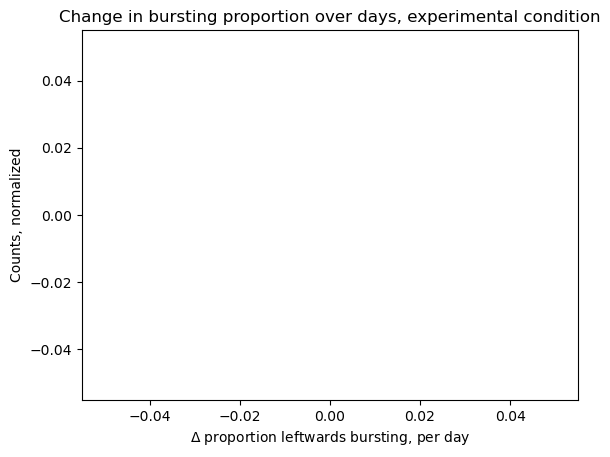

In [13]:
plt.hist(exp_differences_df["proportion change"], density = True)
plt.title("Change in bursting proportion over days, experimental condition")
plt.ylabel("Counts, normalized")
plt.xlabel("$\Delta$ proportion leftwards bursting, per day")

# Combine

In [14]:
display(control_differences_df)
display(exp_differences_df)

NameError: name 'control_differences_df' is not defined

In [15]:
range = [-0.4, 0.4]
bins = 20

plt.hist(control_differences_df["proportion change"], density = True, label = "control", alpha = 0.8, range = range, bins = bins)
plt.hist(exp_differences_df["proportion change"], density = True, label = "experimental", alpha = 0.8, range = range, bins = bins)
plt.title("Change in bursting proportion over days")
plt.ylabel("Counts, normalized")
plt.xlabel("$\Delta$ proportion leftwards bursting, per day")
plt.legend()

NameError: name 'control_differences_df' is not defined